<h1>План исследования<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общая-информация" data-toc-modified-id="Общая-информация-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общая информация</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Распределение-заведений-по-категориям-и-сетям" data-toc-modified-id="Распределение-заведений-по-категориям-и-сетям-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Распределение заведений по категориям и сетям</a></span></li><li><span><a href="#Количество-посадочных-мест-по-категориям" data-toc-modified-id="Количество-посадочных-мест-по-категориям-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Количество посадочных мест по категориям</a></span></li><li><span><a href="#Топ-15-популярных-сетей-в-Москве-и-средний-рейтинг-заведений" data-toc-modified-id="Топ-15-популярных-сетей-в-Москве-и-средний-рейтинг-заведений-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Топ-15 популярных сетей в Москве и средний рейтинг заведений</a></span></li><li><span><a href="#Деление-по-административным-районам-и-рейтинги-по-округам" data-toc-modified-id="Деление-по-административным-районам-и-рейтинги-по-округам-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Деление по административным районам и рейтинги по округам</a></span></li><li><span><a href="#Топ-15-улиц-по-количеству-заведений--и-не-самые-популярные-улицы" data-toc-modified-id="Топ-15-улиц-по-количеству-заведений--и-не-самые-популярные-улицы-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Топ-15 улиц по количеству заведений  и не самые популярные улицы</a></span></li><li><span><a href="#Ценовые-категории" data-toc-modified-id="Ценовые-категории-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Ценовые категории</a></span></li></ul></li><li><span><a href="#Детализируем-исследование:-открытие-кофейни" data-toc-modified-id="Детализируем-исследование:-открытие-кофейни-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Детализируем исследование: открытие кофейни</a></span></li></ul></div>

# Исследование рынка заведений общественного питания Москвы

Инвесторы из фонда «Shut Up and Take My Money» решили открыть заведение общественного питания в Москве. Заказчики ещё не знают, что это будет за место: кафе, ресторан, пиццерия, паб или бар, — и какими будут расположение, меню и цены. Необходимо подготовить исследование рынка Москвы, найти интересные особенности и презентовать полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места.   
Доступен датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года.   
Основателям фонда «Shut Up and Take My Money» не даёт покоя успех сериала «Друзья». Их мечта — открыть такую же крутую и доступную, как «Central Perk», кофейню в Москве. Заказчики не боятся конкуренции в этой сфере, хотя кофеен в больших городах уже достаточно. Необходимо дать рекомендации по открытию кофейни.

**Цель проекта: помочь инвесторам в выборе подходящего места и категории заведения общественного питания. Дать рекомендации по открытию кофейни**

**Презентация проекта:**
https://drive.google.com/file/d/1h4bUlZHBQVsaxSxCyefRs5AbRiv29mLk/view?usp=sharing

## Общая информация

Подгружаем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
# подключаем модуль для работы с JSON-форматом
import json
# импортируем карту, маркер и хороплет
from folium import Map, Choropleth, Marker
# импортируем кластер
from folium.plugins import MarkerCluster

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_colwidth = 130

Загрузим массивы и файлы с данными для анализа.

In [3]:
data = pd.read_csv('/datasets/moscow_places.csv')

Данные об округах Москвы из датасета:

In [4]:
# читаем файл и сохраняем в переменной
with open('/datasets/admin_level_geomap.geojson', 'r') as f:
    geo_json = json.load(f)

In [5]:
# загружаем JSON-файл с границами округов Москвы
state_geo = '/datasets/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

Выведем общую информацию по сету с данными:

In [6]:
# функция вывода общей информации
def general_info(df):
        df.columns = map(str.lower, df.columns)
        display(f'Названия столбцов: {df.columns}')
        display(f'Строк, столбцов: {df.shape}')
        display(f'Общая информация:')
        display(df.info())
        display(round(df.describe().T, 2))
        display(df.sample(10))

Вывод общей информации:

In [7]:
general_info(data)

"Названия столбцов: Index(['name', 'category', 'address', 'district', 'hours', 'lat', 'lng',\n       'rating', 'price', 'avg_bill', 'middle_avg_bill', 'middle_coffee_cup',\n       'chain', 'seats'],\n      dtype='object')"

'Строк, столбцов: (8406, 14)'

'Общая информация:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


None

count   mean      std   min    25%    50%      75%  \
lat               8,406.00  55.75     0.07 55.57  55.71  55.75    55.80   
lng               8,406.00  37.61     0.10 37.36  37.54  37.61    37.66   
rating            8,406.00   4.23     0.47  1.00   4.10   4.30     4.40   
middle_avg_bill   3,149.00 958.05 1,009.73  0.00 375.00 750.00 1,250.00   
middle_coffee_cup   535.00 174.72    88.95 60.00 124.50 169.00   225.00   
chain             8,406.00   0.38     0.49  0.00   0.00   0.00     1.00   
seats             4,795.00 108.42   122.83  0.00  40.00  75.00   140.00   

                        max  
lat                   55.93  
lng                   37.87  
rating                 5.00  
middle_avg_bill   35,000.00  
middle_coffee_cup  1,568.00  
chain                  1.00  
seats              1,288.00

name  category  \
2333                 Скалка  булочная   
1659                  Тинта  пиццерия   
1132                Кафешка      кафе   
6656            Алло! Пицца  пиццерия   
3931               Брусника      кафе   
687                  Тануки  ресторан   
3631              Энтузиаст   бар,паб   
5209            #КешбэкКафе      кафе   
3784  Ресторан Много Лосося  ресторан   
4266                   Pims      кафе   

                                        address  \
2333         Москва, 1-я Останкинская улица, 23   
1659  Москва, Новодмитровская улица, 2, корп. 5   
1132                  Москва, Снежная улица, 26   
6656                Москва, улица Покрышкина, 5   
3931    Москва, Оболенский переулок, 9, корп. 1   
687      Москва, Дмитровское шоссе, 64, корп. 3   
3631          Москва, Столешников переулок, 7с5   
5209       Москва, Большая Татарская улица, 11С   
3784                 Москва, улица Красина, 9с1   
4266                  Москва, Усачёва улица, 26   

                                     district  \
2333  Северо-Восточный административный округ   
1659  Северо-Восточный административный округ   
1132  Северо-Восточный административный округ   
6656          Западный административный округ   
3931       Центральный административный округ   
687           Северный административный округ   
3631       Центральный административный округ   
5209       Центральный административный округ   
3784       Центральный административный округ   
4266       Центральный административный округ   

                                                     hours   lat   lng  \
2333                                ежедневно, 08:00–22:00 55.82 37.62   
1659                                ежедневно, 10:00–23:00 55.80 37.59   
1132                                      сб круглосуточно 55.86 37.65   
6656                                ежедневно, 10:00–23:00 55.66 37.47   
3931                                ежедневно, 08:00–23:00 55.73 37.58   
687   пн-чт 12:00–23:00; пт,сб 12:00–01:00; вс 12:00–23:00 55.86 37.56   
3631  пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00–00:00 55.76 37.61   
5209                                     пн-пт 09:00–17:00 55.74 37.63   
3784                                ежедневно, 11:00–22:00 55.77 37.59   
4266  пн-чт 08:00–22:00; пт,сб 08:00–23:00; вс 08:00–22:00 55.73 37.57   

      rating          price                  avg_bill  middle_avg_bill  \
2333    4.50            NaN                       NaN              NaN   
1659    4.60        средние   Средний счёт:900–1200 ₽         1,050.00   
1132    4.60            NaN                       NaN              NaN   
6656    4.20        средние   Средний счёт:500–1000 ₽           750.00   
3931    4.70            NaN                       NaN              NaN   
687     4.40            NaN  Средний счёт:1000–1500 ₽         1,250.00   
3631    3.60            NaN                       NaN              NaN   
5209    4.00            NaN                       NaN              NaN   
3784    4.20  выше среднего   Средний счёт:500–2000 ₽         1,250.00   
4266    4.10            NaN                       NaN              NaN   

      middle_coffee_cup  chain  seats  
2333                NaN      1    NaN  
1659                NaN      0    NaN  
1132                NaN      1 210.00  
6656                NaN      1  24.00  
3931                NaN      1  85.00  
687                 NaN      1 198.00  
3631                NaN      0    NaN  
5209                NaN      0    NaN  
3784                NaN      0    NaN  
4266                NaN      1 100.00

  - У нас есть массив на 8406 строк и 14 столбцов. Большая часть данных типа object, числовой формат для координат, рейтинга, среднего чека и чашки кофе, количества посадочных мест. Значения сеть/не сеть - целые числа: 0/1.   
  - По статистическим данным можно сделать выводы, что рейтинг заведений варьируется от 0 до 5, в среднем чуть более 4 (4.23/4.3).   
  - Средний счет, как ни странно для Мск, меньше 1000. Возможно, это говорит о преобладании не самого дорогого сегмента - столовые, фаст-фуд, кофейни. Т.к. цена чашки кофе в среднем около 170 р. Исследуем далее, каких заведений больше. И какие популярнее.   
  - Количество посадочных мест в среднем 75-100. Есть максимум в 1288, который стоит изучить отдельно. 

## Предобработка данных

Проверим наличие дубликатов. Перед этим приведем к одному регистру наименования заведений и написания адресов.


In [8]:
# приводим к нижнему регистру наимеование заведений и адреса
data['name'] = data['name'].str.lower()
data['address'] = data['address'].str.lower()

In [9]:
 display(f'Дубликаты строк в массиве: {data.duplicated().sum()}')

'Дубликаты строк в массиве: 0'

Полные дубликаты строк в массиве отсутствуют.   
Проверим дубликаты по названиям заведений.

In [10]:
data['name'].nunique()

5512

Уникальных названий 5512, то есть почти 3000 повторов. Проверим дубли по названиям в сочетании с категориями:

In [11]:
data[data.duplicated(['name', 'category'])].sort_values(by='name')

name  category  \
7590  10 идеальных пицц  ресторан   
5069  10 идеальных пицц  ресторан   
4723           18 грамм   кофейня   
3282           18 грамм   кофейня   
4632        7 сэндвичей   кофейня   
...                 ...       ...   
5201       яндекс.лавка  ресторан   
3107       яндекс.лавка  ресторан   
7497     японская кухня  ресторан   
7031     японская кухня      кафе   
8226             ё-ланч  столовая   

                                            address  \
7590         москва, улица паустовского, 6, корп. 1   
5069           москва, улица большие каменщики, 9се   
4723     москва, набережная академика туполева, 15б   
3282  москва, шелепихинская набережная, 34, корп. 2   
4632    москва, 4-й сыромятнический переулок, 3/5с3   
...                                             ...   
5201           москва, улица большие каменщики, 9си   
3107            москва, улица академика павлова, 50   
7497                 москва, мячковский бульвар, 3а   
7031             москва, балаклавский проспект, 14а   
8226          москва, дубининская улица, 57, стр. 4   

                                    district  \
7590     Юго-Западный административный округ   
5069      Центральный административный округ   
4723      Центральный административный округ   
3282  Северо-Западный административный округ   
4632      Центральный административный округ   
...                                      ...   
5201      Центральный административный округ   
3107         Западный административный округ   
7497    Юго-Восточный административный округ   
7031            Южный административный округ   
8226            Южный административный округ   

                                     hours   lat   lng  rating    price  \
7590                ежедневно, 11:45–22:30 55.60 37.54    4.30      NaN   
5069                ежедневно, 11:45–22:30 55.74 37.66    4.30      NaN   
4723  пн-пт 08:00–21:00; сб,вс 09:00–21:00 55.76 37.68    4.40  средние   
3282  пн-пт 08:00–22:00; сб,вс 09:00–22:00 55.76 37.51    4.60      NaN   
4632                ежедневно, 09:00–19:00 55.75 37.67    4.20  средние   
...                                    ...   ...   ...     ...      ...   
5201                ежедневно, 07:00–02:00 55.74 37.66    3.50      NaN   
3107                ежедневно, 07:00–00:00 55.75 37.41    2.80      NaN   
7497                ежедневно, 10:00–02:00 55.66 37.75    4.30      NaN   
7031                                   NaN 55.64 37.61    4.40      NaN   
8226                     пн-пт 09:00–17:00 55.72 37.64    3.90      NaN   

                           avg_bill  middle_avg_bill  middle_coffee_cup  \
7590                            NaN              NaN                NaN   
5069                            NaN              NaN                NaN   
4723  Цена чашки капучино:100–200 ₽              NaN             150.00   
3282                            NaN              NaN                NaN   
4632         Средний счёт:160–500 ₽           330.00                NaN   
...                             ...              ...                ...   
5201                            NaN              NaN                NaN   
3107                            NaN              NaN                NaN   
7497                            NaN              NaN                NaN   
7031                            NaN              NaN                NaN   
8226                            NaN              NaN                NaN   

      chain  seats  
7590      1 150.00  
5069      1    NaN  
4723      1    NaN  
3282      1    NaN  
4632      1    NaN  
...     ...    ...  
5201      1    NaN  
3107      1    NaN  
7497      1   0.00  
7031      1 150.00  
8226      1  64.00  

[2437 rows x 14 columns]

Видим, что это в основном сетевые заведения, с одинаковыми названиями, но разным расположением. Проверим дубликаты с адресами:

In [12]:
data[data.duplicated(['address'])].sort_values(by='address')


name  category  \
1311               prime  ресторан   
4298             catcher      кафе   
4251         hudson deli      кафе   
8217            кофегусь   кофейня   
8163              рикису      кафе   
...                  ...       ...   
7893         просто кофе   кофейня   
7935  пицца суши пекарня  пиццерия   
7869           море есть  ресторан   
7928          суши бай б  ресторан   
5184         мята lounge   бар,паб   

                                           address  \
1311  москва, 1-й волоколамский проезд, 10, стр. 1   
4298      москва, 1-й красногвардейский проезд, 19   
4251    москва, 1-й красногвардейский проезд, 21с2   
8217   москва, 1-й нагатинский проезд, 11, корп. 1   
8163   москва, 1-й нагатинский проезд, 11, корп. 2   
...                                            ...   
7893           москва, ясеневая улица, 12, корп. 1   
7935           москва, ясеневая улица, 12, корп. 5   
7869           москва, ясеневая улица, 12, корп. 5   
7928                    москва, ясеневая улица, 29   
5184                    москва, яузская улица, 8с2   

                                    district  \
1311  Северо-Западный административный округ   
4298      Центральный административный округ   
4251      Центральный административный округ   
8217            Южный административный округ   
8163            Южный административный округ   
...                                      ...   
7893            Южный административный округ   
7935            Южный административный округ   
7869            Южный административный округ   
7928            Южный административный округ   
5184      Центральный административный округ   

                                                     hours   lat   lng  \
1311                                     пн-пт 08:00–19:00 55.80 37.49   
4298                                ежедневно, 10:00–21:30 55.75 37.54   
4251                                     пн-пт 08:00–20:00 55.75 37.53   
8217                  пн-пт 08:00–21:00; сб,вс 09:00–21:00 55.68 37.63   
8163                                ежедневно, 11:00–23:00 55.68 37.63   
...                                                    ...   ...   ...   
7893                  пн-пт 08:00–21:30; сб,вс 09:00–21:30 55.60 37.73   
7935                                ежедневно, 09:00–22:00 55.60 37.73   
7869                                ежедневно, 09:00–23:00 55.60 37.73   
7928                                ежедневно, 11:00–23:00 55.60 37.74   
5184  пн-чт 12:00–02:00; пт,сб 12:00–04:00; вс 12:00–02:00 55.75 37.65   

      rating    price                       avg_bill  middle_avg_bill  \
1311    4.00   низкие         Средний счёт:400–600 ₽           500.00   
4298    4.30      NaN                            NaN              NaN   
4251    4.20  средние        Средний счёт:500–1000 ₽           750.00   
8217    4.20      NaN  Цена чашки капучино:150–200 ₽              NaN   
8163    4.90      NaN                            NaN              NaN   
...      ...      ...                            ...              ...   
7893    4.70      NaN   Цена чашки капучино:от 100 ₽              NaN   
7935    4.10      NaN                            NaN              NaN   
7869    4.40      NaN                            NaN              NaN   
7928    4.50      NaN                            NaN              NaN   
5184    4.30      NaN                            NaN              NaN   

      middle_coffee_cup  chain  seats  
1311                NaN      1 100.00  
4298                NaN      0    NaN  
4251                NaN      0    NaN  
8217             175.00      0 100.00  
8163                NaN      0  20.00  
...                 ...    ...    ...  
7893             100.00      0  90.00  
7935                NaN      0    NaN  
7869                NaN      0    NaN  
7928                NaN      0  45.00  
5184                NaN      1    NaN  

[2654 rows x 14 columns]

Судя по фрагменту, это разные заведения "под одной крышей": в ТЦ на фуд-кортах, просто в одном здании.

Найдем столбцы с пропусками в данных:

In [13]:
na = [i for i in data.columns if data[i].isna().sum() != 0]    
for i in na:
    print(i, 'пропусков', data[i].isna().sum(), 'процент', round(data[i].isna().mean()*100, 2))

hours пропусков 536 процент 6.38
price пропусков 5091 процент 60.56
avg_bill пропусков 4590 процент 54.6
middle_avg_bill пропусков 5257 процент 62.54
middle_coffee_cup пропусков 7871 процент 93.64
seats пропусков 3611 процент 42.96


 Информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках. Этим объясняются пропуски более 50% в столбцах стоимости. Пропусков в часах работы довольно мало, нет смысла их заменять. 43% пропусков в данных по количеству посадочных мест. В отзывах такое редко упоминается, да и владельцы заведений не всегда указывают. К тому же - это могут быть заведения "на вынос" без мест.

Выделим столбец с названиями улиц. Для этого методом split выделим второй элемент между запятыми.

In [14]:
data['street'] = data['address'].apply(lambda x: x.split(',')[1].strip())
data.sample(10)

name  category  \
2863  кафе подзонти.com      кафе   
6204          эдельвейс      кафе   
1753        бодрый день      кафе   
2590        на бульваре  столовая   
4297                эзо  ресторан   
5972           прогресс      кафе   
8058               ippo   кофейня   
1053               leon  ресторан   
1979          лахинкали  ресторан   
58        coffeekaldi's   кофейня   

                                           address  \
2863  москва, малая семёновская улица, 28, стр. 19   
6204       москва, ленинский проспект, 65, корп. 3   
1753                москва, селезнёвская улица, 22   
2590              москва, измайловский бульвар, 49   
4297             москва, пресненская набережная, 2   
5972    москва, фрунзенская набережная, 30, стр. 5   
8058               москва, холодильный переулок, 4   
1053           москва, проспект мира, 119, стр. 10   
1979                   москва, планетная улица, 45   
58             москва, угличская улица, 13, стр. 8   

                                     district  \
2863         Восточный административный округ   
6204      Юго-Западный административный округ   
1753       Центральный административный округ   
2590         Восточный административный округ   
4297       Центральный административный округ   
5972       Центральный административный округ   
8058             Южный административный округ   
1053  Северо-Восточный административный округ   
1979          Северный административный округ   
58    Северо-Восточный административный округ   

                                                     hours   lat   lng  \
2863                                ежедневно, 10:00–22:00 55.78 37.71   
6204                                                   NaN 55.69 37.56   
1753                  пн-пт 08:00–20:00; сб,вс 09:00–20:00 55.78 37.61   
2590                                ежедневно, 08:30–22:00 55.80 37.80   
4297  пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00–22:00 55.75 37.54   
5972                                ежедневно, 11:00–00:00 55.72 37.58   
8058                  пн-пт 08:00–22:00; сб,вс 09:00–21:00 55.71 37.62   
1053                  вт-пт 12:00–20:00; сб,вс 12:00–22:00 55.83 37.63   
1979                                ежедневно, 11:00–00:00 55.81 37.54   
58                                  ежедневно, 09:00–22:00 55.90 37.57   

      rating          price                 avg_bill  middle_avg_bill  \
2863    4.00            NaN  Средний счёт:300–1000 ₽           650.00   
6204    2.90            NaN                      NaN              NaN   
1753    4.90            NaN                      NaN              NaN   
2590    4.60            NaN                      NaN              NaN   
4297    4.20  выше среднего   Средний счёт:от 1400 ₽         1,400.00   
5972    4.80            NaN                      NaN              NaN   
8058    4.50            NaN                      NaN              NaN   
1053    4.00            NaN                      NaN              NaN   
1979    4.30            NaN                      NaN              NaN   
58      4.10        средние   Средний счёт:500–800 ₽           650.00   

      middle_coffee_cup  chain  seats                   street  
2863                NaN      0  10.00  малая семёновская улица  
6204                NaN      0  45.00       ленинский проспект  
1753                NaN      0    NaN       селезнёвская улица  
2590                NaN      0  80.00     измайловский бульвар  
4297                NaN      1 350.00   пресненская набережная  
5972                NaN      1  35.00   фрунзенская набережная  
8058                NaN      0    NaN     холодильный переулок  
1053                NaN      1    NaN            проспект мира  
1979                NaN      0    NaN          планетная улица  
58                  NaN      1    NaN          угличская улица

Проверим, что в созданном столбце нет пропусков.

In [15]:
data['street'].isna().sum()

0

Исследуем варианты времени работы в столбце 'hours':

In [16]:
data['hours'].nunique()

1307

In [17]:
data['hours'].value_counts()

ежедневно, 10:00–22:00                  759
ежедневно, круглосуточно                730
ежедневно, 11:00–23:00                  396
ежедневно, 10:00–23:00                  310
ежедневно, 12:00–00:00                  254
                                       ... 
пн-пт 10:00–19:00; сб,вс 10:00–20:00      1
вт-вс 09:00–19:00                         1
пн-чт 19:00–03:00; пт-вс 19:00–05:00      1
ежедневно, 10:30–22:00                    1
ежедневно, 10:00–23:10                    1
Name: hours, Length: 1307, dtype: int64

1307 вариантов написания времени работы заведения. Из них 730 заведений работают 24/7 = 'ежедневно, круглосуточно'

In [18]:
data.loc[(data['hours'] == 'ежедневно, круглосуточно')].head()

name  category                                   address  \
10      great room bar   бар,паб            москва, левобережная улица, 12   
17  чайхана беш-бармак  ресторан  москва, ленинградское шоссе, 71б, стр. 2   
19             пекарня  булочная                москва, ижорский проезд, 5   
24          drive café      кафе               москва, улица дыбенко, 9ас1   
49             2u-ту-ю  пиццерия                москва, ижорская улица, 8а   

                           district                     hours   lat   lng  \
10  Северный административный округ  ежедневно, круглосуточно 55.88 37.47   
17  Северный административный округ  ежедневно, круглосуточно 55.88 37.45   
19  Северный административный округ  ежедневно, круглосуточно 55.89 37.52   
24  Северный административный округ  ежедневно, круглосуточно 55.88 37.48   
49  Северный административный округ  ежедневно, круглосуточно 55.89 37.51   

    rating    price                    avg_bill  middle_avg_bill  \
10    4.50  средние  Цена бокала пива:250–350 ₽              NaN   
17    4.40  средние      Средний счёт:350–500 ₽           425.00   
19    4.40      NaN                         NaN              NaN   
24    4.00      NaN                         NaN              NaN   
49    2.70      NaN          Средний счёт:900 ₽           900.00   

    middle_coffee_cup  chain  seats               street  
10                NaN      0 102.00   левобережная улица  
17                NaN      0  96.00  ленинградское шоссе  
19                NaN      1    NaN      ижорский проезд  
24                NaN      1    NaN        улица дыбенко  
49                NaN      0    NaN       ижорская улица

Создадим отдельный столбец с булевыми значениями для заведений 24/7:

In [19]:
data['is_24/7'] = data['hours']

In [20]:
# перебираем каждый тип времени работы в наборе уникальных значений столбца
for h in data['is_24/7'].unique():
    # на каждом шаге цикла с помощью атрибута loc выбираем строки,
    # в которых текущий тип времени работы (h) равен 'ежедневно, круглосуточно' и не равен
    data.loc[(data['hours'] == 'ежедневно, круглосуточно'), 'is_24/7'] = True
    data.loc[(data['hours'] != 'ежедневно, круглосуточно'), 'is_24/7'] = False
data.tail()

name category                                     address  \
8401    суши мания     кафе               москва, профсоюзная улица, 56   
8402     миславнес     кафе  москва, пролетарский проспект, 19, корп. 1   
8403       самовар     кафе      москва, люблинская улица, 112а, стр. 1   
8404  чайхана sabr     кафе      москва, люблинская улица, 112а, стр. 1   
8405    kebab time     кафе              москва, россошанский проезд, 6   

                                  district                     hours   lat  \
8401   Юго-Западный административный округ    ежедневно, 09:00–02:00 55.67   
8402          Южный административный округ    ежедневно, 08:00–22:00 55.64   
8403  Юго-Восточный административный округ  ежедневно, круглосуточно 55.65   
8404  Юго-Восточный административный округ  ежедневно, круглосуточно 55.65   
8405          Южный административный округ  ежедневно, круглосуточно 55.60   

       lng  rating price               avg_bill  middle_avg_bill  \
8401 37.55    4.40   NaN                    NaN              NaN   
8402 37.66    4.80   NaN                    NaN              NaN   
8403 37.74    3.90   NaN  Средний счёт:от 150 ₽           150.00   
8404 37.74    4.20   NaN                    NaN              NaN   
8405 37.60    3.90   NaN                    NaN              NaN   

      middle_coffee_cup  chain  seats                 street is_24/7  
8401                NaN      0  86.00      профсоюзная улица   False  
8402                NaN      0 150.00  пролетарский проспект   False  
8403                NaN      0 150.00       люблинская улица    True  
8404                NaN      1 150.00       люблинская улица    True  
8405                NaN      0  12.00    россошанский проезд    True

В ходе предобработки явных дубликатов не выявлено.
Неявные дубликаты по названиям и категориям - это в основном сетевые заведения, с одинаковыми названиями, но разным расположением. Есть также дубликаты по адресам. Судя по фрагменту массива, это разные заведения "под одной крышей": в ТЦ на фуд-кортах, просто в одном здании.
Найдено количество и процент пропущенных значений в столбцах: часов работы (пропусков 536 процент 6.38), цен (пропусков 5091 процент 60.56), счета (пропусков 4590 процент 54.6), среднего счета (пропусков 5257 процент 62.54), средней стоимости чашки кофе (пропусков 7871 процент 93.64) и количества посадочных мест (пропусков 3611 процент 42.96). Так как информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках, заменять эти пропуски средними значениями в категориях будет некорректно. Просто учтем их в ходе дальнейшего анализа.  
При анализе времени работы заведений выявлено 1307 вариантов написания. Из них 730 заведений работают 24/7 = 'ежедневно, круглосуточно'. Добавлен отдельный столбец 'is_24/7' со значениями True/False.

## Анализ данных

### Распределение заведений по категориям и сетям

Без учета сетевых заведений:

In [21]:
category = data.pivot_table(index=['category'], values='name', aggfunc='count').sort_values(by='name', ascending = False).reset_index()
category.rename(columns={'name': 'sum'}, inplace=True)
all = len(data)
category['mean'] = category['sum']/all*100
category

category   sum  mean
0             кафе  2378 28.29
1         ресторан  2043 24.30
2          кофейня  1413 16.81
3          бар,паб   765  9.10
4         пиццерия   633  7.53
5  быстрое питание   603  7.17
6         столовая   315  3.75
7         булочная   256  3.05

In [22]:
category['mean'].sum()

100.0

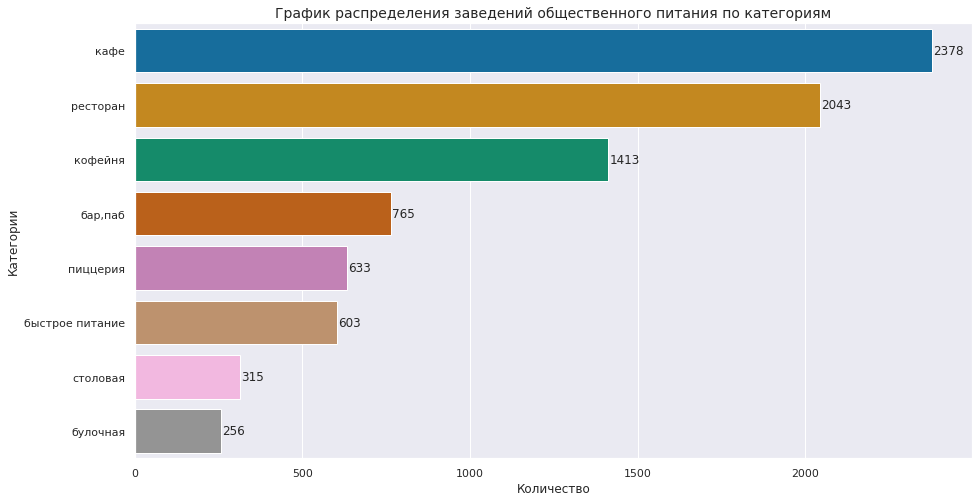

In [23]:
sns.set(rc={'figure.figsize':(15, 8)})
sns.set_palette('colorblind') 
ax = sns.barplot(x='sum', y='category', data=category, orient='h')
ax.set_title('График распределения заведений общественного питания по категориям', fontsize=14)
plt.xlabel('Количество')
plt.ylabel('Категории')
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    ax.text(x = width+3, y=p.get_y() + (height/2), s='{:.0f}'.format(width), va="center")
plt.show()

In [24]:
category.columns = ['Категория','Количество','Процент']
display(category)

Категория  Количество  Процент
0             кафе        2378    28.29
1         ресторан        2043    24.30
2          кофейня        1413    16.81
3          бар,паб         765     9.10
4         пиццерия         633     7.53
5  быстрое питание         603     7.17
6         столовая         315     3.75
7         булочная         256     3.05

Больше всего в Москве заведений (> 60%) в категориях: кафе 28 %, ресторан 24%  и кофейня 17% - в процентах от общего количества, баров, пиццерий и фаст-фудов - 9,8 и 7 %, столовых и булочных - меньше всего (4 и 3 %).

С учетом сетевых заведений:

In [25]:
category_u = data.pivot_table(index=['category'], columns='chain', values='name', aggfunc='count')
category_u.rename(columns={ 1: 'chain', 0: 'uniq'}, inplace=True)
category_u.reset_index()
category_u['chain_part'] = category_u['chain']/category_u['uniq']
display(category_u.sort_values(by=['chain_part']).reset_index())

chain         category  uniq  chain  chain_part
0              бар,паб   596    169        0.28
1             столовая   227     88        0.39
2                 кафе  1599    779        0.49
3             ресторан  1313    730        0.56
4      быстрое питание   371    232        0.63
5              кофейня   693    720        1.04
6             пиццерия   303    330        1.09
7             булочная    99    157        1.59

В большинстве категорий больше несетевых заведений. Реже всего сетевыми бывают бары (28% сетевых баров от числа несетевых).  
Рассчитаем количество и долю сетевых заведений в целом:

In [26]:
uniq_sum = category_u.uniq.sum()
chain_sum = category_u.chain.sum()

In [27]:
display(f'Уникальных заведений: {uniq_sum} от общего количества {uniq_sum/(chain_sum+uniq_sum):.0%}')
display(f'Сетевых заведений: {chain_sum} от общего количества {chain_sum/(chain_sum+uniq_sum):.0%}')

'Уникальных заведений: 5201 от общего количества 62%'

'Сетевых заведений: 3205 от общего количества 38%'

In [ ]:
colors = ['#DC5F00', '#1F8A70']

fig = go.Figure(data=[go.Pie(labels=['Сетевые', 'Несетевые'],
                             values=[chain_sum, uniq_sum])])
fig.update_traces(hoverinfo='label+percent', textinfo='value+percent',textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title="Соотношение сетевых и несетевых заведений", title_x = 0.5)
fig.show()

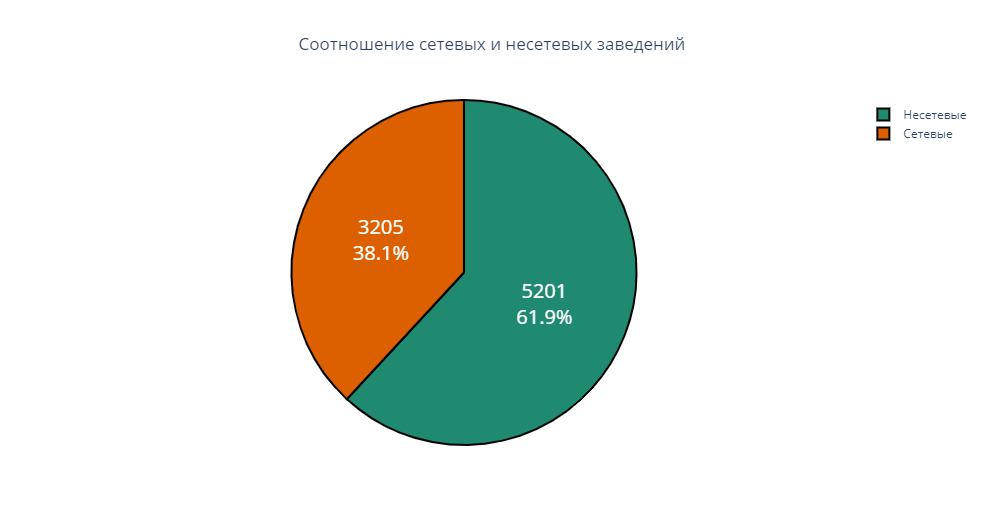

Распределение долей между несетевыми и сетевыми заведениями примерно 60 на 40 %.

Подготовим данные для визуализации и построим график распределения заведений сетевого и несетевого типа по категориям.

In [29]:
category_u1 = data.groupby(['category', 'chain']).agg({'name': 'count'}).reset_index().sort_values(by=['name'], ascending=False)
category_u1

category  chain  name
6              кафе      0  1599
12         ресторан      0  1313
7              кафе      1   779
13         ресторан      1   730
9           кофейня      1   720
8           кофейня      0   693
0           бар,паб      0   596
4   быстрое питание      0   371
11         пиццерия      1   330
10         пиццерия      0   303
5   быстрое питание      1   232
14         столовая      0   227
1           бар,паб      1   169
3          булочная      1   157
2          булочная      0    99
15         столовая      1    88

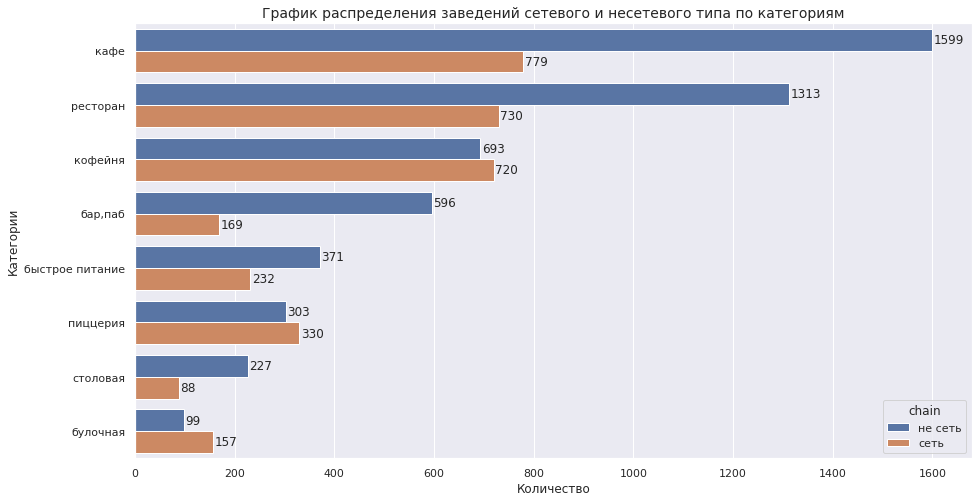

In [30]:
category_u1['chain'] = category_u1['chain'].apply(lambda x: 'не сеть' if x == 0 else 'сеть')
sns.set(rc={'figure.figsize':(15, 8)})
sns.set_palette('deep')
ax = sns.barplot(x='name', y='category', hue='chain', data=category_u1, orient='h')
ax.set_title('График распределения заведений сетевого и несетевого типа по категориям', fontsize=14)
plt.xlabel('Количество')
plt.ylabel('Категории')

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    ax.text(x = width+3, y=p.get_y() + (height/2), s='{:.0f}'.format(width), va="center")
plt.show()

В категориях кафе и ресторан количество сетевых заведений примерно в 2 раза меньше количества несетевых.

Визуализируем, в каких категориях сетевых заведений больше, чем несетевых.

In [31]:
category_chain = category_u.query('chain > uniq').sort_values(by=['chain'], ascending=False).reset_index()
category_chain['part'] = category_chain['chain']/category_chain['uniq']
category_chain

chain  category  uniq  chain  chain_part  part
0       кофейня   693    720        1.04  1.04
1      пиццерия   303    330        1.09  1.09
2      булочная    99    157        1.59  1.59

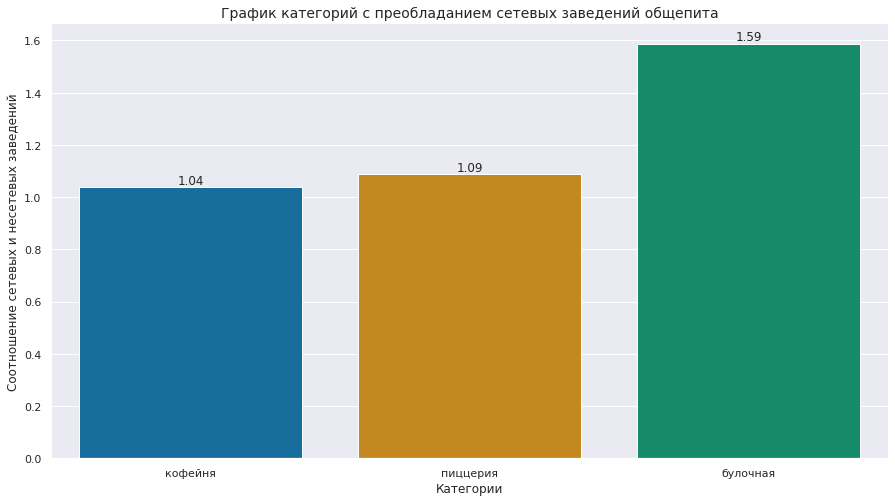

In [32]:
sns.set(rc={'figure.figsize':(15, 8)})
sns.set_palette('colorblind') 
ax = sns.barplot(x='category', y='part', data=category_chain)
ax.set_title('График категорий с преобладанием сетевых заведений общепита', fontsize=14)
plt.xlabel('Категории')
plt.ylabel('Соотношение сетевых и несетевых заведений')
for p in ax.patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
    value = '{:.2f}'.format(p.get_height())
    ax.text(_x, _y, value, ha="center")
plt.show()

По количеству сетевых лидируют кофейни, пиццерии и булочные. Причем самая большая доля сетевых по отношению к несетевым заведениям - у булочных. Сетевых булочных в 1.6 раза больше, чем несетевых. А вот сетевых пиццерий и кофеен только чуть больше, чем несетевых заведений того же типа, примерно 50 на 50 %.

### Количество посадочных мест по категориям

Рассчитаем среднее количество посадочных мест в каждой категории:

In [33]:
category_s = data.groupby(['category']).agg({'seats': 'mean'}).reset_index().sort_values(by=['seats'], ascending=False)
category_s

category  seats
0          бар,паб 124.53
6         ресторан 121.94
4          кофейня 111.20
7         столовая  99.75
2  быстрое питание  98.89
3             кафе  97.51
5         пиццерия  94.50
1         булочная  89.39

По расчетам больше всего посадочных мест в барах, ресторанах и кофейнях. Сильно удивляют булочные практически с таким же количеством мест, как в пиццериях. Возможно, такое среднее объясняется расположением многих объектов на фуд-кортах, где огромное количество мест может относиться сразу ко всем расположенным по периметру заведениям. Если смотреть по статистике посадочных мест в 1 разделе исследования, то велик разброс данных. Посмотрим на боксплоты.

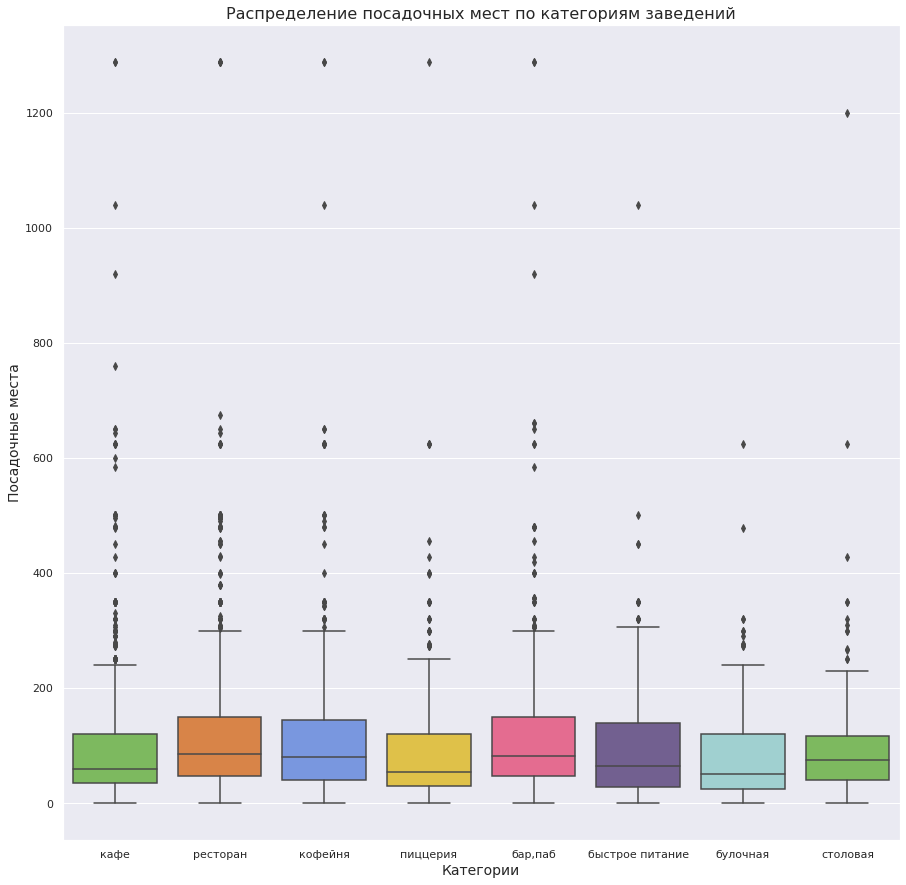

In [34]:
sns.set(rc={'figure.figsize':(15, 15)})
colors = ['#78C850', '#F08030', '#6890F0','#F8D030', '#F85888', '#705898', '#98D8D8']
boxplot = sns.boxplot(x='category', y='seats',data=data, palette=colors)
boxplot.axes.set_title("Распределение посадочных мест по категориям заведений", fontsize=16)
boxplot.set_xlabel("Категории", fontsize=14)
boxplot.set_ylabel("Посадочные места", fontsize=14)
plt.show()

Большая часть данных по заведениям распологается в пределе до 350 посадочных мест, остальное - выбросы. Которые могут объясняться ошибками в данных. Поэтому для более правдивого представления о количестве посадочных мест по категориям будем рассматривать их медиану.

In [35]:
def add_median_labels(ax, fmt='.1f'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:{fmt}}', ha='center', va='center',
                       fontweight='bold', size=20, color='white')

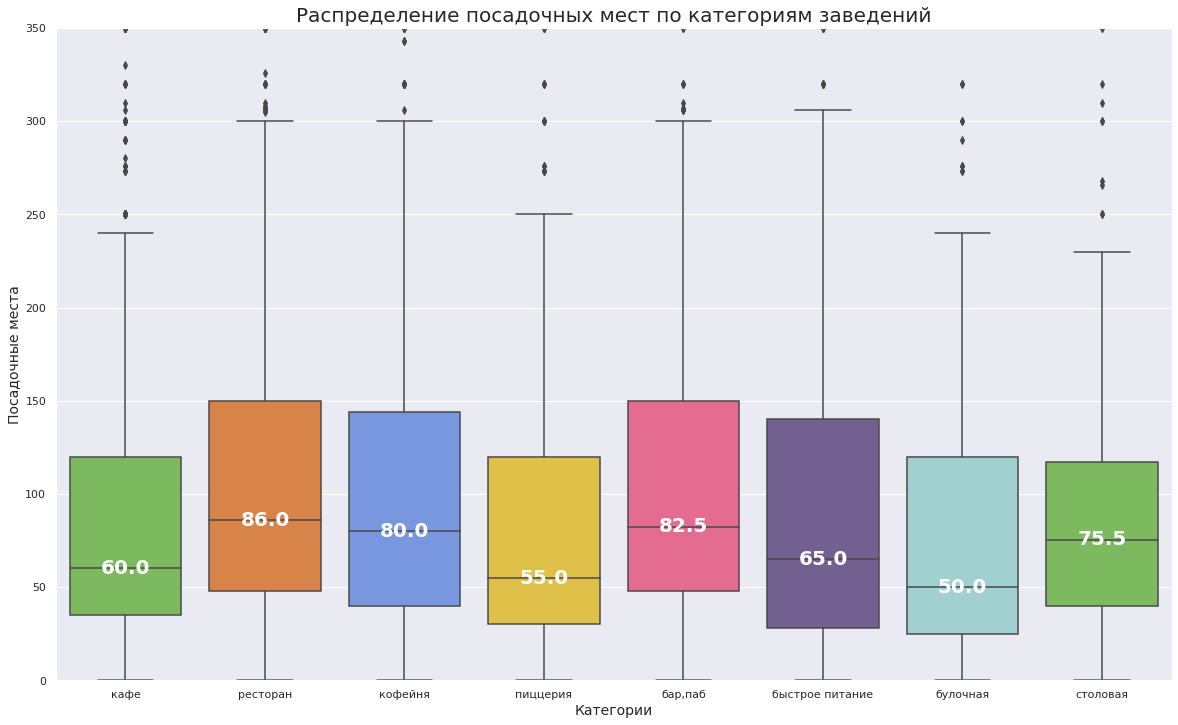

In [36]:
sns.set(rc={'figure.figsize':(20, 12)})
colors = ['#78C850', '#F08030', '#6890F0','#F8D030', '#F85888', '#705898', '#98D8D8']
ax = sns.boxplot(x='category', y='seats',data=data, palette=colors)
ax.axes.set_title("Распределение посадочных мест по категориям заведений", fontsize=20)
ax.set_xlabel("Категории", fontsize=14)
ax.set_ylabel("Посадочные места", fontsize=14)
ax.set_ylim(0,350)
add_median_labels(ax)
plt.show()

In [37]:
category_sm = data.groupby(['category']).agg({'seats': 'median'}).reset_index().sort_values(by=['seats'], ascending=False)
category_sm['seats'] = category_sm['seats'].astype(int)
category_sm.columns = ['Категории', 'Количество мест']
category_sm

Категории  Количество мест
6         ресторан               86
0          бар,паб               82
4          кофейня               80
7         столовая               75
2  быстрое питание               65
3             кафе               60
5         пиццерия               55
1         булочная               50

По количеству посадочных мест лидируют рестораны, бары и кофейни с количеством посадочных мест от 80 до 86. Меньше всего мест в булочных и пиццериях (50-55), что объясняется особенностями заведений. Не будем забывать, что по посадочным местам 43% пропусков, которые могут относиться к заведениям, продающим еду на вынос.

In [38]:
data.query('seats.isna()').groupby(['category']).agg({'name': 'count'}).reset_index().sort_values(by=['name'], ascending=False)

category  name
3             кафе  1160
6         ресторан   773
4          кофейня   662
0          бар,паб   297
2  быстрое питание   254
5         пиццерия   206
7         столовая   151
1         булочная   108

Больше всего пропусков по категориям кафе, ресторан и кофейня пропорционально количеству заведений в этих категориях.

### Топ-15 популярных сетей в Москве и средний рейтинг заведений

Найдем 15 наиболее популярных сетей в Москве по количеству заведений сети.

In [39]:
top15 = data.query('chain == 1').groupby(['name'])['name'].count().sort_values(ascending=False).head(15)
top15

name
шоколадница                            120
домино'с пицца                          76
додо пицца                              74
one price coffee                        71
яндекс лавка                            69
cofix                                   65
prime                                   50
хинкальная                              44
кофепорт                                42
кулинарная лавка братьев караваевых     39
теремок                                 38
чайхана                                 37
cofefest                                32
буханка                                 32
му-му                                   27
Name: name, dtype: int64

Можно было бы исключить чайхану и хинкальную, т.к. есть сомнения, что это не простое совпадение имен, а заведения одной сети. Но с другой стороны и чайхану, и хинкальную по сути можно считать категорией заведений, а не наименованием. И любопытно посмотреть на их популярность.

In [40]:
top15name = top15.index[:15].to_list()
top15name

['шоколадница',
 "домино'с пицца",
 'додо пицца',
 'one price coffee',
 'яндекс лавка',
 'cofix',
 'prime',
 'хинкальная',
 'кофепорт',
 'кулинарная лавка братьев караваевых',
 'теремок',
 'чайхана',
 'cofefest',
 'буханка',
 'му-му']

Лидирует "Шоколадница" с большим преимуществом. Также в топ вошли общеизвестные наименования: Доминос и Додо, Теремок и Му-му. Посмотрим категории этих заведений:

In [41]:
top_cat = data.query('name in @top15name')
top_cat1 = top_cat.groupby(['name','category']).agg({'name': 'count'})
top_cat1

name
name                                category             
cofefest                            кафе                1
                                    кофейня            31
cofix                               кофейня            65
one price coffee                    кофейня            72
prime                               кафе                1
                                    ресторан           49
буханка                             булочная           25
                                    кафе                1
                                    кофейня             6
додо пицца                          пиццерия           74
домино'с пицца                      пиццерия           77
кофепорт                            кофейня            42
кулинарная лавка братьев караваевых кафе               39
му-му                               бар,паб             1
                                    быстрое питание     2
                                    кафе               12
                                    кофейня             2
                                    пиццерия            1
                                    ресторан            8
                                    столовая            1
теремок                             быстрое питание     2
                                    ресторан           36
хинкальная                          бар,паб             3
                                    быстрое питание     6
                                    кафе               19
                                    ресторан           15
                                    столовая            1
чайхана                             быстрое питание     2
                                    кафе               26
                                    ресторан            9
шоколадница                         кафе                1
                                    кофейня           119
яндекс лавка                        ресторан           69

Видим, что данные по категориям, относящимся к заведению одного наименования, не совсем корректны. Одно заведение в нескольких категориях. При этом вполне возможно, что в сети могут быть заведения разных категорий под одним названием. Поэтому для визуализации мы снова сгруппируем данные, чтобы получить группировку "1 категория : 1 заведение" в топ 15.

In [42]:
top_places = data.query('chain == 1').groupby(['category', 'name']).agg({'address':'count'}).sort_values(by='address', ascending=False).head(15)
top_places

address
category name                                        
кофейня  шоколадница                              119
пиццерия домино'с пицца                            76
         додо пицца                                74
кофейня  one price coffee                          71
ресторан яндекс лавка                              69
кофейня  cofix                                     65
ресторан prime                                     49
кофейня  кофепорт                                  42
кафе     кулинарная лавка братьев караваевых       39
ресторан теремок                                   36
кофейня  cofefest                                  31
кафе     чайхана                                   26
булочная буханка                                   25
кафе     drive café                                24
кофейня  кофемания                                 22

In [43]:
top_places = (data.query('chain == 1')
             .groupby(['category', 'name']).agg({'address':'count'}).sort_values(by='address', ascending=False).head(15)
             .reset_index())
top_places.columns = ['category','name','cnt_places']
top_places.sort_values(by='cnt_places', ascending=False)

category                                 name  cnt_places
0    кофейня                          шоколадница         119
1   пиццерия                       домино'с пицца          76
2   пиццерия                           додо пицца          74
3    кофейня                     one price coffee          71
4   ресторан                         яндекс лавка          69
5    кофейня                                cofix          65
6   ресторан                                prime          49
7    кофейня                             кофепорт          42
8       кафе  кулинарная лавка братьев караваевых          39
9   ресторан                              теремок          36
10   кофейня                             cofefest          31
11      кафе                              чайхана          26
12  булочная                              буханка          25
13      кафе                           drive café          24
14   кофейня                            кофемания          22

Этот список уже больше похож на правду, в верхней части топа находятся общеизвестные заведения.

In [ ]:
fig = px.bar(top_places, x='category', y='cnt_places',
             color='name')
fig.update_xaxes(title_text='Категории')
fig.update_yaxes(title_text='Количество')
fig.update_layout(title='Топ-15 популярных сетей Москвы', title_x = 0.5,
                 width=1000, height=600)
fig.show()

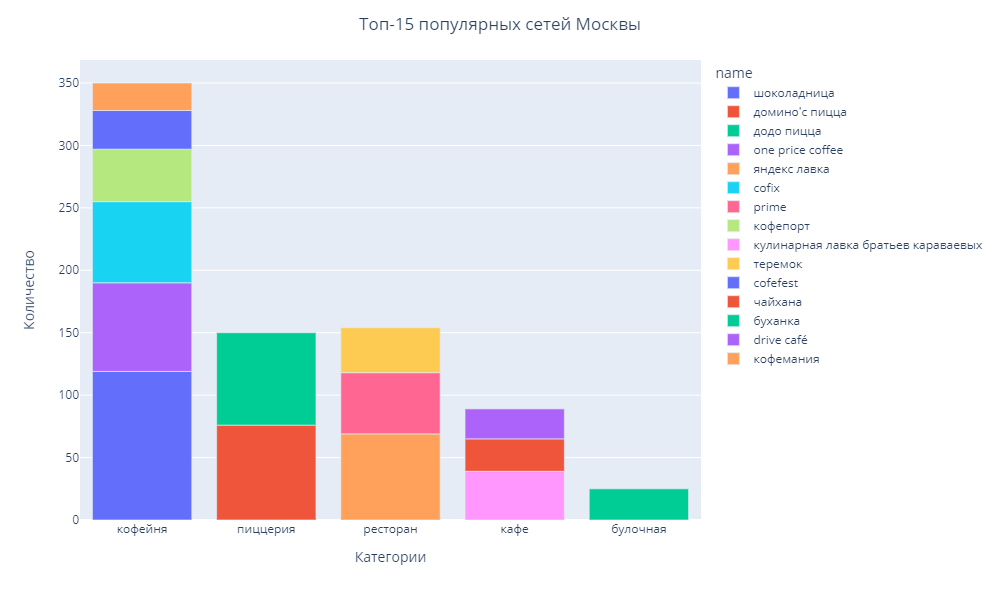

Больше всего сетей в категории "кофейня" - видимо, они самые популярные, проверим это по рейтингу.

Визуализируем распределение средних рейтингов по категориям заведений:

In [45]:
rate = data.groupby(['category']).agg({'rating':'mean'}).sort_values(by='rating', ascending=False).reset_index()
rate

category  rating
0          бар,паб    4.39
1         пиццерия    4.30
2         ресторан    4.29
3          кофейня    4.28
4         булочная    4.27
5         столовая    4.21
6             кафе    4.12
7  быстрое питание    4.05

In [ ]:
fig = px.bar(rate, x='category', y='rating', color_discrete_sequence=["green"])
fig.update_xaxes(tickangle=45)
fig.update_layout(title='Средний рейтинг заведений по категориям', title_x = 0.5,
                   xaxis_title='Категория',
                   yaxis_title='Рейтинг')
fig.show()

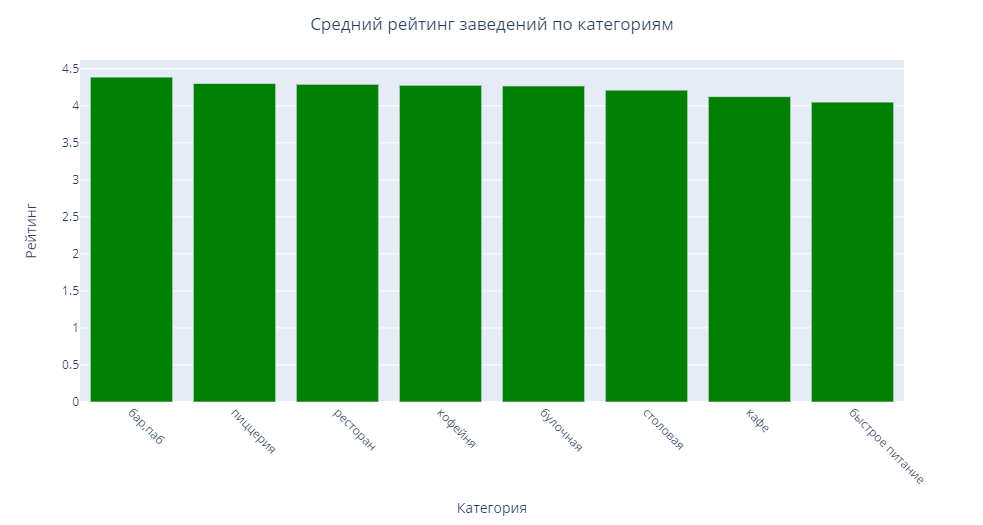

Самый высокий рейтинг у баров. Пиццерии, рестораны, кофейни и булочные примерно на одном уровне. В целом средний рейтинг заведений всех категорий не ниже 4 баллов.

In [47]:
rate.columns = ['Категория', 'Рейтинг']
rate

Категория  Рейтинг
0          бар,паб     4.39
1         пиццерия     4.30
2         ресторан     4.29
3          кофейня     4.28
4         булочная     4.27
5         столовая     4.21
6             кафе     4.12
7  быстрое питание     4.05

In [48]:
rate_ch = data.query('chain == 1').groupby(['category']).agg({'rating':'mean'}).sort_values(by='rating', ascending=False).reset_index()
rate_ch

category  rating
0          бар,паб    4.39
1         булочная    4.29
2         пиццерия    4.28
3         столовая    4.24
4         ресторан    4.23
5          кофейня    4.21
6             кафе    4.20
7  быстрое питание    4.06

Среди сетевых заведений бары по прежнему лидируют по рейтингу, а прямо за ними булочные и пиццерии. Сетевые кофейни и рестораны оцениваются ниже, чем несетевые. Но в целом - все заведения попали в рейтинг от 4 до 4.4, как и ранее.

### Деление по административным районам и рейтинги по округам

Посмотрим,какие административные районы Москвы присутствуют в датасете, и сколько заведений общепита по каждому округу:

In [49]:
count = data['district'].value_counts()
cnt = pd.DataFrame(count).reset_index()
cnt.columns = ['district', 'cnt']
cnt

district   cnt
0       Центральный административный округ  2242
1          Северный административный округ   900
2             Южный административный округ   892
3  Северо-Восточный административный округ   891
4          Западный административный округ   851
5         Восточный административный округ   798
6     Юго-Восточный административный округ   714
7      Юго-Западный административный округ   709
8   Северо-Западный административный округ   409

В датасете представлено 9 округов. Разделим заведения этих округов по категориям:

In [50]:
distr_places = (data
             .groupby(['district','category']).agg({'name':'count'}).sort_values(by='name')
             .reset_index())
distr_places.columns = ['district','category','cnt_places']
distr_places

district  category  cnt_places
0   Северо-Западный административный округ  булочная          12
1     Юго-Восточный административный округ  булочная          13
2      Юго-Западный административный округ  столовая          17
3   Северо-Западный административный округ  столовая          18
4   Северо-Западный административный округ   бар,паб          23
..                                     ...       ...         ...
67    Юго-Восточный административный округ      кафе         282
68      Центральный административный округ   бар,паб         364
69      Центральный административный округ   кофейня         428
70      Центральный административный округ      кафе         464
71      Центральный административный округ  ресторан         670

[72 rows x 3 columns]

In [ ]:
fig = px.bar(distr_places, y = 'district', x = 'cnt_places',
             color = 'category')
fig.update_layout(title="Распределение категорий заведений по округам", title_x = 0.5)
fig.update_xaxes(title_text='Количество заведений')
fig.update_yaxes(title_text='Округ, категории', tickangle=45)
fig.show()

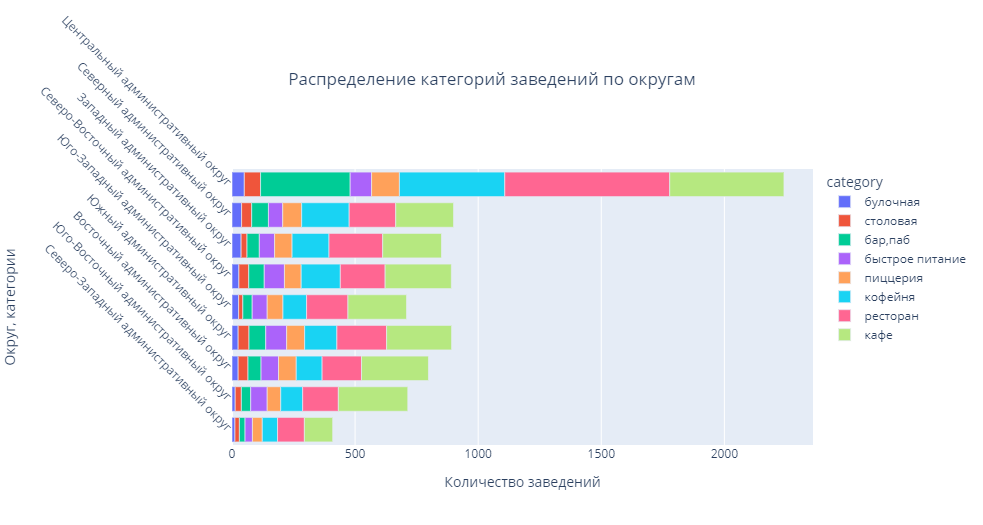

По количеству заведений с большим отрывом лидирует ЦАО. Северо-запад не так насыщен заведениями общепита, как остальные районы. Во всех районах превалируют по количеству: кафе, рестораны и кофейни. В Центральном районе доля баров и пабов гораздо выше по сравнению с другими районами (приближается к количеству кофеен - 4 место по количеству заведений).

Для каждого округа посчитаем медианный рейтинг торговых центров, которые находятся на его территории:

In [52]:
rating_df = data.groupby('district', as_index=False)['rating'].agg('median').sort_values(by='rating', ascending=False)

Создадим хороплет со средним рейтингом заведений каждого района. 

In [53]:
# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

In [ ]:
# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=rating_df,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Медианный рейтинг заведений по районам',
).add_to(m)

# выводим карту
m

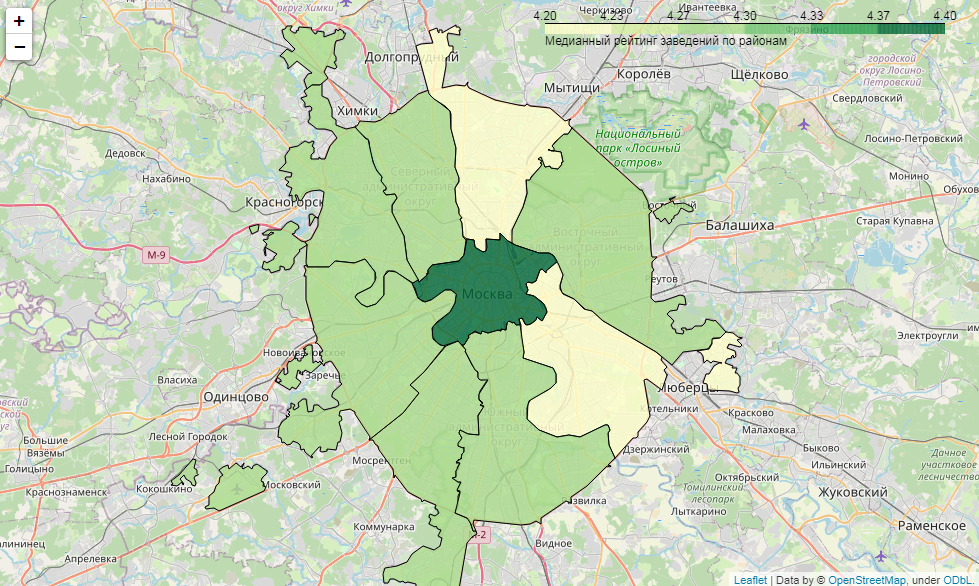

Самый высокий рейтинг у заведений в ЦАО(4.4), самый низкий СВАО и ЮВАО (по 4.2). Что напрямую коррелирует и с количеством заведений в этих округах.

Отобразим все заведения датасета на карте с помощью кластеров средствами библиотеки folium.

In [ ]:
# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

# применяем функцию create_clusters() к каждой строке датафрейма
data.apply(create_clusters, axis=1)

# выводим карту
m

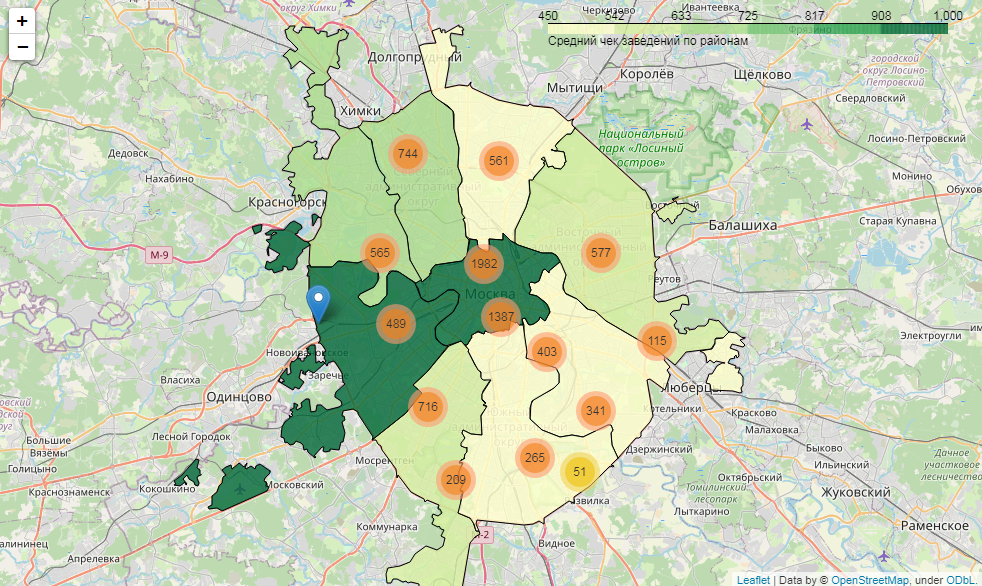

In [56]:
rating_df = cnt.merge(rating_df, on='district', how='left')
rating_df.columns = ['АО', 'кол-во заведений', 'рейтинг']
rating_df

АО  кол-во заведений  рейтинг
0       Центральный административный округ              2242     4.40
1          Северный административный округ               900     4.30
2             Южный административный округ               892     4.30
3  Северо-Восточный административный округ               891     4.20
4          Западный административный округ               851     4.30
5         Восточный административный округ               798     4.30
6     Юго-Восточный административный округ               714     4.20
7      Юго-Западный административный округ               709     4.30
8   Северо-Западный административный округ               409     4.30

Очевидно, что количество заведений в СВАО и ЮВАО гораздо меньше, чем в остальных. И похоже качество тоже ниже.

### Топ-15 улиц по количеству заведений  и не самые популярные улицы

Найдем топ-15 улиц по количеству заведений. Построим график распределения количества заведений и их категорий по этим улицам.

In [57]:
top15s = data.groupby(['street'])['name'].count().sort_values(ascending=False).head(15)
top15s

street
проспект мира             184
профсоюзная улица         122
проспект вернадского      108
ленинский проспект        107
ленинградский проспект     95
дмитровское шоссе          88
каширское шоссе            77
варшавское шоссе           76
ленинградское шоссе        70
мкад                       65
люблинская улица           60
улица вавилова             55
кутузовский проспект       54
улица миклухо-маклая       49
пятницкая улица            48
Name: name, dtype: int64

In [58]:
top15sname = top15s.index[:15].to_list()

In [59]:
top15_str = (data
              .query('street in @top15sname')
              .groupby(['street','category']).agg({'name':'count'}).sort_values(by='name', ascending=True)
             .reset_index())
top15_str.columns = ['street','category','cnt_places']
top15_str

street  category  cnt_places
0        люблинская улица  пиццерия           1
1                    мкад   бар,паб           1
2                    мкад  столовая           1
3    проспект вернадского  булочная           1
4    кутузовский проспект  булочная           1
..                    ...       ...         ...
106     профсоюзная улица      кафе          35
107         проспект мира   кофейня          36
108         проспект мира  ресторан          45
109                  мкад      кафе          45
110         проспект мира      кафе          53

[111 rows x 3 columns]

In [ ]:
fig = px.bar(top15_str, y = 'street', x = 'cnt_places',
             color = 'category')
fig.update_layout(title="Распределение категорий заведений по улицам (топ-15)", title_x = 0.5)
fig.update_xaxes(title_text='Количество заведений')
fig.update_yaxes(title_text='Улицы', tickangle=45)
fig.show()

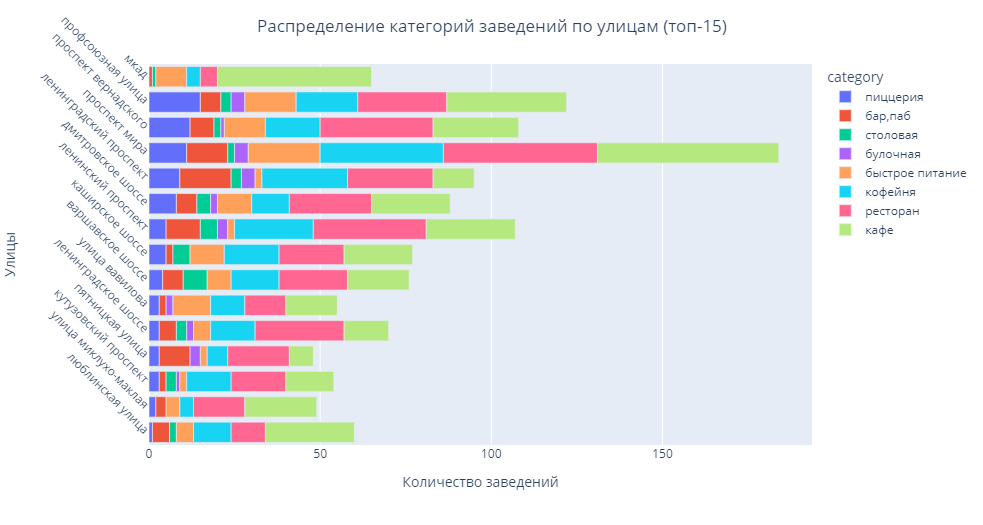

Все эти улицы отличаются большой протяженностью, пересекают крупные перекрестки и дорожные развязки, располагаются вблизи станций метро. Что обуславливает большой поток потенциальных клиентов.

Поближе рассмотрим улицы, на которых находится только один объект общепита.

In [61]:
one_str = data.groupby(['street'])['name'].count().sort_values().reset_index()
one_str.columns = ['street', 'cnt']
one_str = one_str.query('cnt == 1')
one_street = one_str['street'].tolist()
one_str1 = data.query('street in @one_street')
one_str1.sample(5)

name  category                                       address  \
3605     арти  ресторан             москва, 1-й земельный переулок, 1   
8289    мираж  ресторан                     москва, улица шкулёва, 2а   
5519  чайхана      кафе             москва, сквер имени м.и. калинина   
4364    blanc  ресторан            москва, хохловский переулок, 7-9с5   
1908   оливка      кафе  москва, красностуденческий проезд, 4, стр. 2   

                                  district  \
3605    Центральный административный округ   
8289  Юго-Восточный административный округ   
5519  Юго-Восточный административный округ   
4364    Центральный административный округ   
1908       Северный административный округ   

                                                     hours   lat   lng  \
3605                                ежедневно, 12:00–00:00 55.77 37.56   
8289                  пн-пт 11:00–23:00; сб,вс 11:00–00:00 55.69 37.75   
5519                              ежедневно, круглосуточно 55.75 37.72   
4364  пн-ср 09:00–00:00; чт-сб 09:00–02:00; вс 09:00–00:00 55.76 37.64   
1908                                ежедневно, 08:00–00:00 55.83 37.57   

      rating          price                avg_bill  middle_avg_bill  \
3605    4.90            NaN                     NaN              NaN   
8289    4.70            NaN                     NaN              NaN   
5519    3.90            NaN                     NaN              NaN   
4364    4.70  выше среднего  Средний счёт:от 1500 ₽         1,500.00   
1908    4.30            NaN                     NaN              NaN   

      middle_coffee_cup  chain  seats                     street is_24/7  
3605                NaN      0    NaN     1-й земельный переулок   False  
8289                NaN      0  90.00              улица шкулёва   False  
5519                NaN      1    NaN  сквер имени м.и. калинина    True  
4364                NaN      0    NaN        хохловский переулок   False  
1908                NaN      1   5.00  красностуденческий проезд   False

In [62]:
display(f'Количество улиц с одним заведением общепита: {len(one_street)}')

'Количество улиц с одним заведением общепита: 457'

In [63]:
# кол-во заведений по категориям
str = data.query('street in @one_street ')
str['category'].value_counts()

кафе               159
ресторан            93
кофейня             84
бар,паб             39
столовая            36
быстрое питание     23
пиццерия            15
булочная             8
Name: category, dtype: int64

In [64]:
# посчитаем сетевые заведения
str.query('chain == 1')['category'].value_counts()

кафе               43
кофейня            32
ресторан           22
пиццерия            9
столовая            9
быстрое питание     8
бар,паб             6
булочная            4
Name: category, dtype: int64

Это улицы небольшой протяженности, находятся внутри жилых массивов, примыкают к паркам, поликлиникам, находятся рядом со школами. Поток людей не слишком велик, обычно это люди, спешащие в школу, на работу в больницу. Местные жители. Заведения представлены в основном кафе, примерно в 2 раза меньше ресторанов и кофеен. Большая часть заведений - несетевые.

Проверим, какие категории заведений распространены в жилых районах (на непопулярных улицах с малой проходимостью).

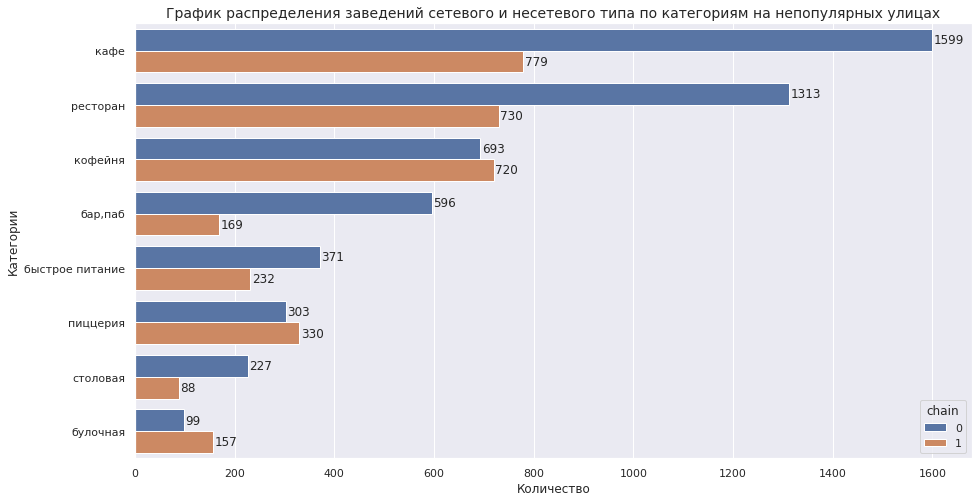

In [65]:
one_str2 = data.groupby(['category', 'chain']).agg({'name': 'count'}).reset_index().sort_values(by=['name'], ascending=False)
sns.set(rc={'figure.figsize':(15, 8)})
sns.set_palette('deep')
ax = sns.barplot(x ='name', y ='category', hue='chain', data=one_str2)
ax.set_title('График распределения заведений сетевого и несетевого типа по категориям на непопулярных улицах', fontsize=14)
plt.xlabel('Количество')
plt.ylabel('Категории')
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    ax.text(x = width+3, y=p.get_y() + (height/2), s='{:.0f}'.format(width), va="center")
plt.show()

Видим, что несетевые кафе и рестораны - самое то для семейных посиделок. А вот кофейни, пиццерии и булочные даже здесь чаще относятся к популярным сетям.

### Ценовые категории

Значения средних чеков заведений хранятся в столбце middle_avg_bill. Эти числа показывают примерную стоимость заказа в рублях, которая чаще всего выражена диапазоном. Посчитаем медиану этого столбца для каждого района.

In [66]:
price = data.groupby('district', as_index=False)['middle_avg_bill'].median().sort_values(by='middle_avg_bill', ascending=False)
price

district  middle_avg_bill
1          Западный административный округ         1,000.00
5       Центральный административный округ         1,000.00
4   Северо-Западный административный округ           700.00
2          Северный административный округ           650.00
7      Юго-Западный административный округ           600.00
0         Восточный административный округ           575.00
3  Северо-Восточный административный округ           500.00
8             Южный административный округ           500.00
6     Юго-Восточный административный округ           450.00

 Самые дорогие районы - ожидаемо, ЦАО и ЗАО.   
 Используем полученное значение среднего счета в качестве ценового индикатора района. Построим фоновую картограмму (хороплет) с полученными значениями для каждого района.

In [67]:
# создаём карту Москвы
m1 = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=price,
    columns=['district', 'middle_avg_bill'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Средний чек заведений по районам',
).add_to(m1)

In [ ]:
# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m1)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['middle_avg_bill']}",
    ).add_to(marker_cluster)

# применяем функцию create_clusters() к каждой строке датафрейма
data.apply(create_clusters, axis=1)

# выводим карту
m1

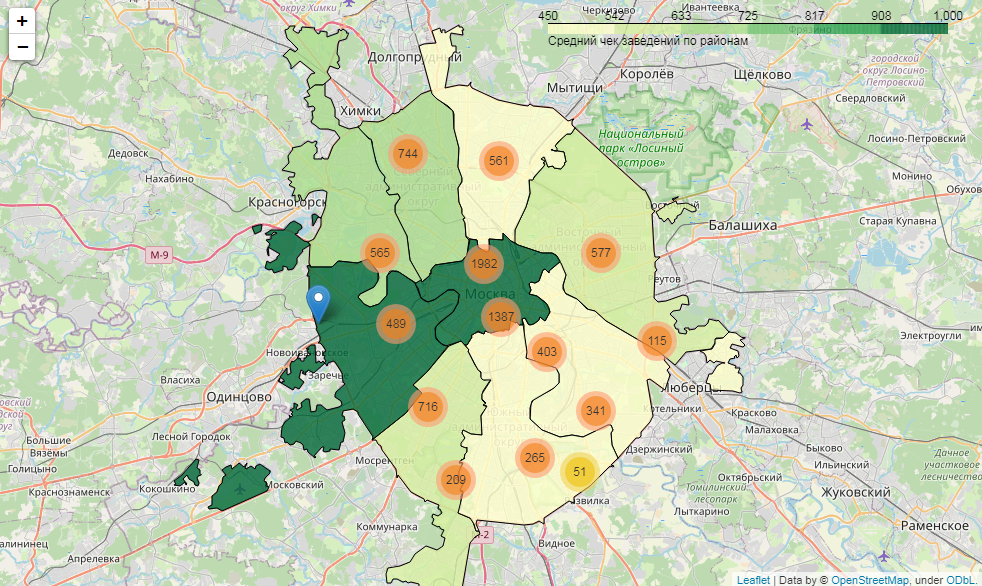

Учитывая количество пропусков в ценах датасета (middle_avg_bill пропусков 5257 процент 62.54) и источник данных, стопроцентно доверять этим данным нельзя. Но приближенно мы видим, что средние цены в ВО, ЮВО, ЮО самые низкие (средний чек 450 р.). Чуть дороже ВО. Примерно в середине СО и СЗО. Чем ближе заведение к центру, тем выше в нем цены. Например, средний счет в одной из хинкалиных ЦАО 1500 р., а средний счет хинкальной (атмосфера) в ЮАО 500 р.

**ВЫВОДЫ:**

*Категории заведений и сети:*   
- больше всего в Москве заведений в категориях: кафе 28 %, ресторан 24% и кофейня 17% - в процентах от общего количества, баров, пиццерий и фаст-фудов - 9, 8 и 7 %, столовых и булочных - меньше всего (4 и 3 %);  
- при этом заведений уникальных (несетевых) 5201 от общего количества или 62%;
- сетевых заведений 3205 от общего количества или 38%;
- в большинстве категорий больше несетевых заведений. Реже всего сетевыми бывают бары (28% сетевых баров от числа несетевых), в категориях кафе и ресторан количество сетевых заведений примерно в 2 раза меньше количества несетевых. По количеству сетевых заведений лидируют кофейни, пиццерии и булочные. Причем самая большая доля сетевых по отношению к несетевым заведениям - у булочных. Сетевых булочных в 1.6 раза больше, чем несетевых. А вот сетевых пиццерий и кофеен только чуть больше, чем несетевых заведений того же типа, примерно 50 на 50 %.   

*Количество посадочных мест:*
- по расчетам больше всего посадочных мест в барах, ресторанах и кофейнях. Сильно удивляют булочные практически с таким же количеством мест, как в пиццериях. Возможно, такое среднее объясняется расположением многих объектов на фуд-кортах, где огромное количество мест может относиться сразу ко всем расположенным по периметру заведениям;
- если смотреть по статистике посадочных мест, то велик разброс данных, что подтверждается параметрами боксплотов. Не будем забывать, что по посадочным местам 43% пропусков, которые могут относиться к заведениям, продающим еду на вынос.И не стоит слишком полагаться на качество предоставленных данных;
- в среднем количество посадочных мест (по медиане с учетом выбросов) от 50-55 в булочных и пиццериях до 86 в ресторанах (83 в барах, 80 в кофейнях).   

*Самые популярные сети и средний рейтинг заведений:*   
- в топ-15 самых популярных сетей вошли: 'шоколадница', "домино'с пицца", 'додо пицца', 'one price coffee', 'яндекс лавка', 'cofix', 'prime', 'хинкальная', 'кофепорт', 'кулинарная лавка братьев караваевых', 'теремок', 'чайхана', 'cofefest', 'буханка', 'му-му'. Данные по категориям, относящимся к этим заведениям, не корректны. Одно заведение в нескольких категориях. При этом вполне возможно, что в сети могут быть заведения разных категорий под одним названием. Поэтому составлен еще один топ-15 по принципу "1 категория : 1 заведение", с теми же лидерами. Выяснилось, что большинство популярных сетей относится к категории "кофейня";
- самый высокий рейтинг у баров (4.39). Пиццерии, рестораны, кофейни и булочные примерно на одном уровне. В целом средний рейтинг заведений всех категорий не ниже 4 баллов. Среди сетевых заведений бары по прежнему лидируют по рейтингу, а прямо за ними булочные и пиццерии. Сетевые кофейни и рестораны оцениваются ниже, чем несетевые. Но в целом - все заведения попали в рейтинг от 4 до 4.4, как сетевые, так и несетевые.   

*Расположение заведение по районам и распределение рейтингов по округам:*
- В датасете представлено 9 округов. По количеству заведений с большим отрывом лидирует ЦАО. Северо-запад не так насыщен заведениями общепита, как остальные районы. Во всех районах превалируют по количеству: кафе, рестораны и кофейни. В Центральном районе доля баров и пабов гораздо выше по сравнению с другими районами (приближается к количеству кофеен - 4 место по количеству заведений);
- самый высокий рейтинг у заведений в ЦАО(4.4), самый низкий СВАО и ЮВАО (по 4.2). Что напрямую коррелирует и с количеством заведений в этих округах. Очевидно, что количество заведений в СВАО и ЮВАО гораздо меньше, чем в остальных. И похоже качество тоже ниже.   

*ТОП-15 улиц по насыщенности заведениями общепита и непопулярные улицы:*
- в топ вошли:
проспект мира             184
профсоюзная улица         122
проспект вернадского      108
ленинский проспект        107
ленинградский проспект     95
дмитровское шоссе          88
каширское шоссе            77
варшавское шоссе           76
ленинградское шоссе        70
мкад                       65
люблинская улица           60
улица вавилова             55
кутузовский проспект       54
улица миклухо-маклая       49
пятницкая улица            48 заведений;
- все эти улицы отличаются большой протяженностью, пересекают крупные перекрестки и дорожные развязки, располагаются вблизи станций метро. Что обуславливает большой поток потенциальных клиентов;
- в массиве 457 улиц, где расположено только 1 заведение общепита. Это улицы небольшой протяженности, находятся внутри жилых массивов, примыкают к паркам, поликлиникам, расположены рядом со школами. Поток людей не слишком велик, обычно это люди, спешащие в школу, на работу в больницу. Местные жители. Заведения представлены в основном кафе, примерно в 2 раза меньше ресторанов и кофеен. Большая часть заведений - несетевые.   

*Цены в заведениях:*
- самые "дорогие" районы, что ожидаемо, ЦАО и ЗАО. Средний чек 1000 р. Учитывая количество пропусков в ценах датасета (middle_avg_bill пропусков 5257 процент 62.54) и источник данных, стопроцентно доверять этим данным нельзя. Но приближенно мы видим, что средние цены в ВО, ЮВО, ЮО самые низкие (средний чек 450 р.). Чуть дороже ВО. Примерно в середине СО и СЗО. Чем ближе заведение к центру, тем выше цены. Например, средний счет в одной из хинкалиных ЦАО = 1500 р., а средний счет хинкальной (атмосфера) в ЮАО = 500 р.

**РЕКОМЕНДАЦИИ ПО ИТОГАМ ОСНОВНОГО ИССЛЕДОВАНИЯ**   
- если судить по насыщенности региона категриями определенных заведений, то есть смысл рассмотреть для открытия такие категории, как бар или пиццерия. У баров самый высокий рейтинг, возможно, алкоголь повышает среднюю оценку.))) При открытии пиццерии есть смысл рассмотреть вариант: стать франчайзи популярной сети;
- посадочных мест в заведении, в зависимости от категории, может быть от 55 до 85. Чтобы уточнить это, стоит провести исследование загруженности конкурентов, получив более точные данные по их посадочным местам, определившись с местоположением открытия своего заведения;
- можно попробовать получить данные популярных сетевых заведений из топ-15 - для более глубокого анализа;
- в качестве места для открытия заведения можно рассмотреть СВАО и ЮВАО, там меньше конкурентов на квадратный метр. ЦАО - не лучший вариант, он насыщен популярными заведениями с высоким рейтингом. Тяжело будет оттянуть поток клиентов;
- но даже в не самых популярных АО располагаться лучше ближе к центру. Более высокие цены конкурентов, могут дать простор для скидок. Для привлечения клиентуры стоит средний чек сделать поменьше, чем у "соседей";
- также предпочтительно расположение на крупных улицах, проспектах, недалеко от станций метро, перекрестков, ТЦ.

## Детализируем исследование: открытие кофейни

Рассмотрим данные в контексте нашей уточненной цели: открытие крутой и доступной кофейни, как из сериала "Друзья". При условии, что клиент не боится конкуренции.

Общее количество кофеен в Москве и по районам:

In [69]:
sum = data.query('category == "кофейня"')['name'].count()
display(f'Общее количество кофеен в Москве: {sum}')

'Общее количество кофеен в Москве: 1413'

Визуализируем распределение кофеен по районам, добавим средний счет в них на маркеры:

In [70]:
sum_distr = data.query('category == "кофейня"').groupby('district', as_index=False)['name'].count().sort_values(by='name', ascending=False)
sum_distr.columns=['district', 'cnt']
sum_distr

district  cnt
5       Центральный административный округ  428
2          Северный административный округ  193
3  Северо-Восточный административный округ  159
1          Западный административный округ  150
8             Южный административный округ  131
0         Восточный административный округ  105
7      Юго-Западный административный округ   96
6     Юго-Восточный административный округ   89
4   Северо-Западный административный округ   62

Центральный округ (428) более, чем в 2 раза опережает следующий в списке Северный округ (193) по количеству кофеен. В СЗАО кофеен меньше всего - 62. ЮЗАО, ЮВАО и ЮЗАО также не слишком насыщены кофейнями.

In [ ]:
# создаём карту Москвы
m2 = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=sum_distr,
    columns=['district', 'cnt'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Количество кофеен по районам',
).add_to(m2)

# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m2)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['middle_avg_bill']}",
    ).add_to(marker_cluster)

# применяем функцию create_clusters() к каждой строке датафрейма
data.apply(create_clusters, axis=1)

# выводим карту
m2

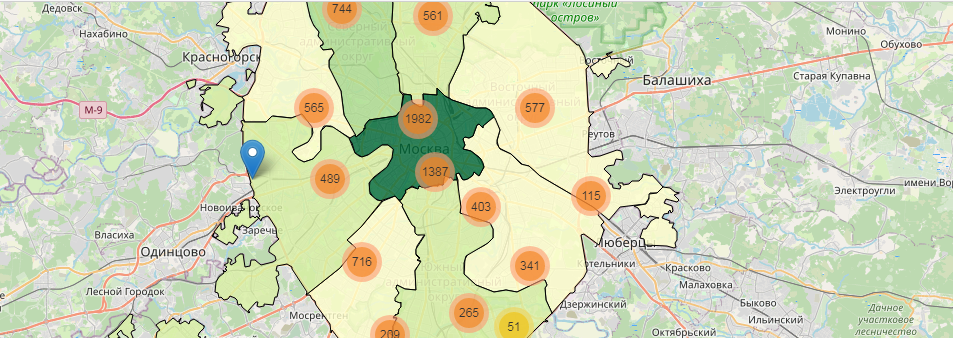

Если наш клиент не боится конкуренции, то стоит открывать кофейню поближе к ЦАО, но вряд ли в нем самом. Неплохими вариантами были бы ЗАО, СЗАО, СВАО - поближе к центру, рядом с Университетом или Останкино. Что обеспечит хорошую проходимость. Не углубляясь во дворы, на крупных улицах, проспектах, поближе к метро и перекресткам. Неплохим вариантом также, например, может быть район Сокольники в ВАО, он не так насыщен конкурентами, но вполне популярен.

Мы уже рассчитывали соотношение сетевых заведений к несетевым, приведем цифры только для кофеен:

In [72]:
chain = data.loc[data['category'] == 'кофейня'].groupby('chain', as_index=False)['name'].count()
chain.columns=['сеть', 'количество']
chain

сеть  количество
0     0         693
1     1         720

Видим, что доли примерно равны, сети имеют небольшой численный перевес.

Посмотрим, сколько кофеен работает круглосуточно:

In [73]:
is24 = data.loc[(data['category'] == 'кофейня') & (data['is_24/7'] == True), ['name']].count()
perc = (is24/sum)*100
perc

name   4.18
dtype: float64

Всего 4%. Где же они располагаются?

In [74]:
data.loc[(data['category'] == 'кофейня') & (data['is_24/7'] == True)]

name category  \
200            wild bean  кофейня   
971       wild bean cafe  кофейня   
1047      wild bean cafe  кофейня   
1214      wild bean cafe  кофейня   
1291         шоколадница  кофейня   
1468           кофе хауз  кофейня   
1790           кофемания  кофейня   
1825          you&coffee  кофейня   
1883           кофемания  кофейня   
2030            cinnabon  кофейня   
2073      wild bean cafe  кофейня   
2245         шоколадница  кофейня   
2334    one price coffee  кофейня   
2353  кофейня one&double  кофейня   
2516               cofix  кофейня   
2636        кофе с собой  кофейня   
3070           wild bean  кофейня   
3081           wild bean  кофейня   
3197         шоколадница  кофейня   
3218         шоколадница  кофейня   
3358          пирог хауз  кофейня   
3366          you&coffee  кофейня   
3509           кофемания  кофейня   
3511              молоко  кофейня   
3685           кофемания  кофейня   
3688           кофемания  кофейня   
3831           кофе хауз  кофейня   
3987       гоголь-моголь  кофейня   
4008           кофемания  кофейня   
4038           кофемания  кофейня   
4088         шоколадница  кофейня   
4112      one and double  кофейня   
4263         шоколадница  кофейня   
4292           кофе хауз  кофейня   
4307         шоколадница  кофейня   
4320         шоколадница  кофейня   
4419             столица  кофейня   
4502           кофемания  кофейня   
4653               cofix  кофейня   
4734        лаванда кофе  кофейня   
4791         шоколадница  кофейня   
4916         шоколадница  кофейня   
5056             кофе on  кофейня   
5131         шоколадница  кофейня   
5256          one&double  кофейня   
5304         шоколадница  кофейня   
5339         шоколадница  кофейня   
5383        кофе с собой  кофейня   
5443         шоколадница  кофейня   
5891    foodmoscowcoffee  кофейня   
6032         шоколадница  кофейня   
6045         шоколадница  кофейня   
6125         шоколадница  кофейня   
6558      wild bean cafe  кофейня   
6592  the wild bean cafe  кофейня   
6890    one more, please  кофейня   
7528      wild bean cafe  кофейня   
7668           wild bean  кофейня   
7923           wild bean  кофейня   

                                                                                         address  \
200                                                              москва, дмитровское шоссе, 107е   
971                                                               москва, ярославское шоссе, 116   
1047                                                            москва, ярославское шоссе, вл3с3   
1214                                                              москва, мкад, 65-й километр, 8   
1291                                              москва, улица народного ополчения, 49, корп. 1   
1468                                                          москва, ленинградский проспект, 74   
1790                                       москва, ленинградский проспект, 37а, корп. 14, стр. 6   
1825                                                москва, улица золоторожский вал, 11, стр. 21   
1883                                                                     москва, лесная улица, 5   
2030                                                            москва, долгоруковская улица, 40   
2073                                                                 москва, бутырская улица, 8а   
2245                                                          москва, краснопрудная улица, 3-5с1   
2334                                                            москва, комсомольская площадь, 3   
2353                                                         москва, комсомольская площадь, 5/43   
2516                                                            москва, комсомольская площадь, 3   
2636                                                              москва, 5-я парковая улица, 42   
3070                                                           москва, мкад, 60-й километр, 4бс1   

In [75]:
sum_distr24 = data.loc[(data['category'] == 'кофейня') & (data['is_24/7'] == True)].groupby('district', as_index=False)['name'].count().sort_values(by='name', ascending=False)
sum_distr24.columns=['district', 'cnt']
sum_distr24

district  cnt
5       Центральный административный округ   26
1          Западный административный округ    9
7      Юго-Западный административный округ    7
0         Восточный административный округ    5
2          Северный административный округ    5
3  Северо-Восточный административный округ    3
4   Северо-Западный административный округ    2
6     Юго-Восточный административный округ    1
8             Южный административный округ    1

In [ ]:
distr24 = (data.loc[(data['category'] == 'кофейня') & (data['is_24/7'] == True)]
              .groupby(['district', 'street']).agg({'name':'count'}).sort_values(by='name', ascending=True)
             .reset_index())
distr24.columns = ['district','street','cnt_places']
fig = px.bar(distr24, x = 'district', y = 'cnt_places',
             color = 'street')
fig.update_layout(title="Расположение кофеен 24/7 по АО Москвы", title_x = 0.5, width=1000, height=750)
fig.update_xaxes(title_text='Количество круглосуточных кофеен')
fig.update_yaxes(title_text='АО', tickangle=45)
fig.show()

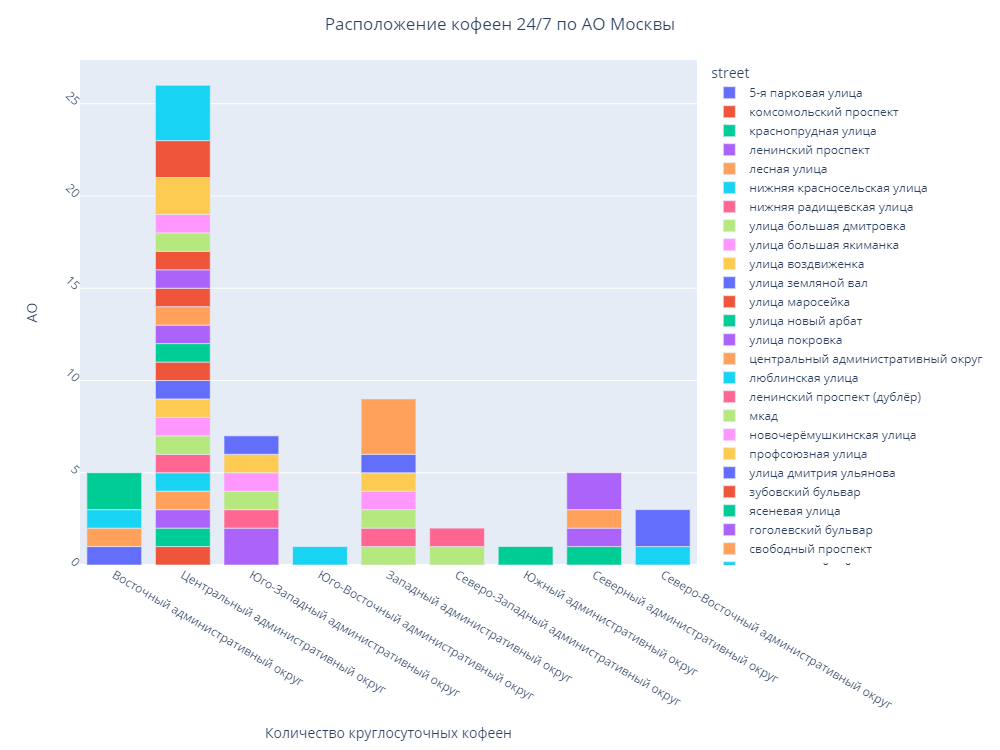

Видим, что круглосуточно работают в основном придорожные заведения на оживленных магистралях, привокзальные и кофейни на проспектах в центре города, который не спит)

In [77]:
chain24 = data.loc[(data['category'] == 'кофейня') & (data['is_24/7'] == True)].groupby('chain', as_index=False)['name'].count()
chain24.columns=['chain', 'cnt']
chain24

chain  cnt
0      0    9
1      1   50

In [ ]:
colors = ['white', '#1F8A70']
chain24['chain'] = chain24['chain'].apply(lambda x: 'несетевое' if x == 0 else 'сетевое')
fig = px.pie(chain24, values='cnt', names='chain',
             title='Соотношение сетевых и несетевых кофеен 24/7')
fig.update_layout(title_x = 0.5)
fig.update_traces(textposition='inside', textinfo='percent',textfont_size=20, 
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

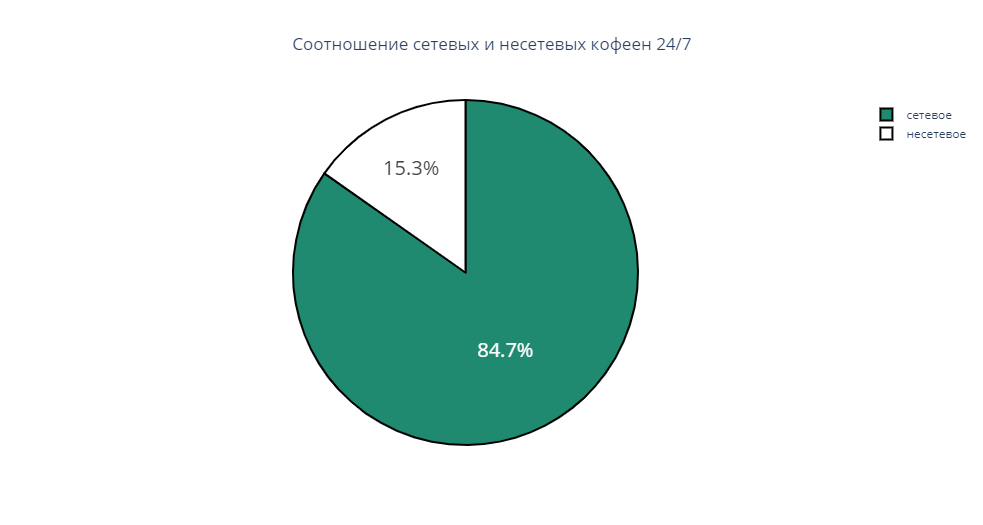

Большая часть кофеен 24/7 - сетевого типа.

Какие у кофеен рейтинги? Как они распределяются по районам?

In [79]:
rating_с = data.query('category == "кофейня"').groupby('district', as_index=False)['rating'].agg('median').sort_values(by='rating', ascending=False)
rating_с

district  rating
0         Восточный административный округ    4.30
2          Северный административный округ    4.30
3  Северо-Восточный административный округ    4.30
4   Северо-Западный административный округ    4.30
5       Центральный административный округ    4.30
6     Юго-Восточный административный округ    4.30
7      Юго-Западный административный округ    4.30
8             Южный административный округ    4.30
1          Западный административный округ    4.20

Средние рейтинги кофеен по АО практически не отличаются - везде 4.3, кроме ЗАО - 4.2. Если клиент не боится конкуренции и уверен в своей концепции, то возможно, стоит повысить рейтинг этого района своим суперуспешным заведением? Предложить более высокое качество продуктов и обслуживания за меньшие цены, ориентируясь на конкурентов.

На какую стоимость чашки капучино стоит ориентироваться при открытии?

In [80]:
cup = data.query('category == "кофейня"').groupby('district', as_index=False)['middle_coffee_cup'].agg('median').sort_values(by='middle_coffee_cup', ascending=False)
cup

district  middle_coffee_cup
7      Юго-Западный административный округ             198.00
5       Центральный административный округ             190.00
1          Западный административный округ             189.00
4   Северо-Западный административный округ             165.00
3  Северо-Восточный административный округ             162.50
2          Северный административный округ             159.00
8             Южный административный округ             150.00
6     Юго-Восточный административный округ             147.50
0         Восточный административный округ             135.00

In [ ]:
# создаём карту Москвы
m3 = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=cup,
    columns=['district', 'middle_coffee_cup'],
    key_on='feature.name',
    fill_color='YlOrBr',
    fill_opacity=0.8,
    legend_name='Чашка кофе по районам',
).add_to(m3)
m3

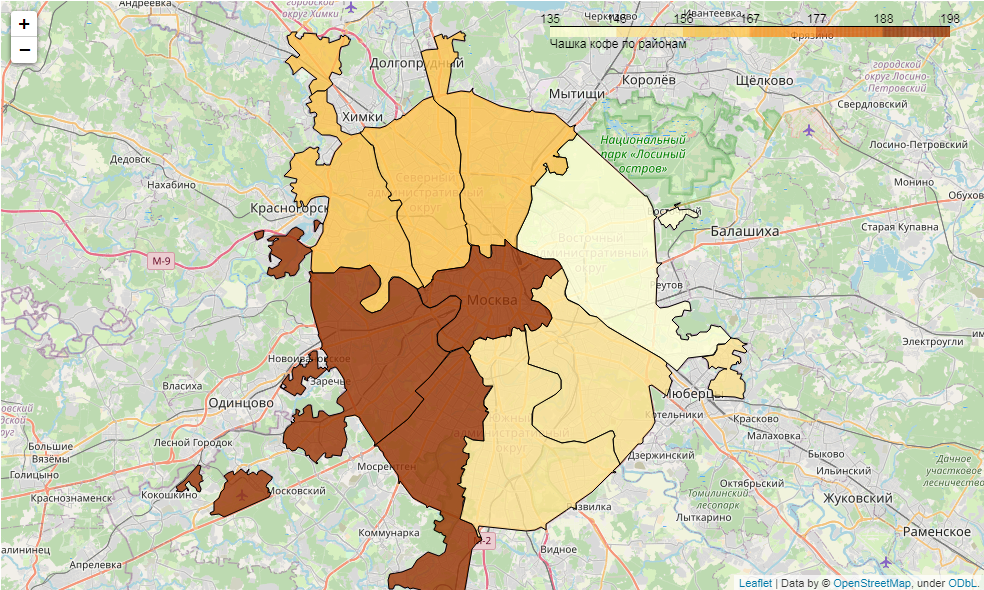

Самый дорогой кофе - в центре и на юго-западе столицы. Восток и юго-восток - самые бюджетные районы.

**РЕКОМЕНДАЦИИ ПО ОТКРЫТИЮ КОФЕЙНИ:**   

- Общее количество кофеен в Москве: 1413. Центральный округ (428) более, чем в 2 раза опережает следующий в списке Северный округ (193) по количеству кофеен. В СЗАО кофеен меньше всего - 62. ЮЗАО, ЮВАО и ВАО также не слишком насыщены кофейнями.   
- Даже не опасаясь конкуренции, стоит открывать кофейню поближе к ЦАО, но вряд ли в нем самом. Неплохими вариантами были бы ЗАО, СЗАО, СВАО - поближе к центру, рядом с Университетом, каким-либо учебным заведением или Останкино, другим творческим центром деятельности (галереи, выставочные центры). Что обеспечит хорошую проходимость и подходящий контингент, если кофейня должна быть похожа на ту, что в "Друзьях". Не углубляясь во дворы, на крупных улицах, проспектах, поближе к метро и перекресткам. Неплохим вариантом также, например, может быть район Сокольники в ВАО, он не так насыщен конкурентами, но вполне популярен. Между станцией метро и парком "Сокольники" или на территории этого огромного парка, с прицелом на молодых и спортивных или просто прогуливающихся.
- Также может "выстрелить" идея открытия круглосуточно работающей кофейни, их довольно мало. Но нужно тщательно обдумать местоположение, где ночью поток людей будет достаточным, чтобы окупить работу заведения в это время. Еще нужно быть готовым конкурировать с сетевыми кофейнями, которые чаще всего располагаются в подобных местах.
- Средние рейтинги кофеен по АО практически не отличаются - везде 4.3, кроме ЗАО - 4.2. Если клиент не боится конкуренции и уверен в своей концепции, то возможно, стоит повысить рейтинг этого района своим суперуспешным заведением? Предложить более высокое качество продуктов и обслуживания за меньшие цены, ориентируясь на конкурентов. К тому же там одна из самых высоких цен на чашку кофе. Самый дорогой кофе - в центре и на юго-западе столицы. Восток и юго-восток - самые бюджетные районы.
- Количество мест в кофейне зависит от концепции заведения.    

 Если мечта - кофейня в "Друзьях", то нужно побольше посадочных мест, бюджетные цены и расположение поближе к учебным заведениям и местам активного отдыха.